# The Divided Counties of America: An Analysis of the Impact of the Venue-Composition of Counties on the Election-Results in the 2020 Presidential Election

## Obtaining relevant Data
We need three different kinds of data for our project. We need a list of all counties in the US with their respective populations and the vote counts within the counties from the presidential election 2020, venue-data from foursquare within the counties we decide to include in our analysis and sociodemographic data of those counties.

In [1]:
import numpy as np
import pandas as pd 

### Obtaining Data on Counties

Fortunately for us, the work of compiling a table of election results by county has allready been done by others. We will with gratitude borrow their data. We can simply use pandas read_html function to import the csv-file from [this project](https://github.com/tonmcg/US_County_Level_Election_Results_08-20).
We are going to use the total number of votes as an estimate for the population-size of the county. We are only interested in relative size, so the total population is not relevant for further analyses.

In [2]:
counties_source = pd.read_html('https://github.com/tonmcg/US_County_Level_Election_Results_08-20/blob/master/2020_US_County_Level_Presidential_Results.csv')
len(counties_source)

1

Only one table was extraced from the github page. Let's put this table into a pandas data frame.

In [3]:
counties=counties_source[0]
counties.head()

,Unnamed: 0,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,NaN,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,NaN,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,NaN,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,NaN,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,NaN,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


Let's drop the first column, since we are not going to need it for our analyses.

In [4]:
counties=counties.drop(counties.columns[0],axis=1)

In [5]:
counties.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


Let's rename our columns and sort by population.

In [6]:
counties.columns=['state', 'fips', 'county', 'votes_trump', 'votes_biden', 'total', 'diff', 'rel_trump', 'rel_biden', 'rel_diff']
counties.sort_values(by=['total'], ascending=False, inplace=True)
counties.head()

,state,fips,county,votes_trump,votes_biden,total,diff,rel_trump,rel_biden,rel_diff
215,California,6037,Los Angeles County,1145530,3028885,4263443,-1883355,0.268687,0.710432,-0.441745
620,Illinois,17031,Cook County,558269,1725973,2321399,-1167704,0.240488,0.743506,-0.503017
114,Arizona,4013,Maricopa County,995665,1040774,2069475,-45109,0.481120,0.502917,-0.021797
2633,Texas,48201,Harris County,700630,918193,1640818,-217563,0.427000,0.559595,-0.132594
233,California,6073,San Diego County,600094,964650,1601722,-364556,0.374656,0.602258,-0.227603


Let's see if we have any missing values

In [7]:
counties.isnull().values.any()

False

Great! We don't have to worry about missing values!

In [8]:
counties.shape

(3152, 10)

### Obtaining Demographic Data for Counties

#### Data on Income and Unemployement
The Economic Research Service of the Department of Agriculture provides us with rich data on Income and Unemployment. We are only going to use the most recent values for each counties and ignore the development of those numbers.

In [75]:
economic=pd.read_csv('https://www.ers.usda.gov/webdocs/DataFiles/48747/Unemployment.csv?v=8085.9')
economic.head(20)

,fips_txt,Stabr,area_name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,1.426017e+08
1,0,US,United States,Employed_2000,1.369047e+08
2,0,US,United States,Unemployed_2000,5.696987e+06
3,0,US,United States,Unemployment_rate_2000,3.995035e+00
4,0,US,United States,Civilian_labor_force_2019,1.631001e+08
5,0,US,United States,Employed_2019,1.571152e+08
6,0,US,United States,Unemployed_2019,5.984808e+06
7,0,US,United States,Unemployment_rate_2019,3.669409e+00
8,0,US,United States,Median_Household_Income_2019,6.571200e+04
9,1000,AL,Alabama,Civilian_labor_force_2000,2.133223e+06


We need the data on FIPS, and the Atrributes Unemployment_rate_2019 and Median_Houshold_Income_2019.

In [76]:
economic=economic[(economic['Attribute']=='Unemployment_rate_2019') |(economic['Attribute']=='Median_Household_Income_2019')]
economic.head(20)

,fips_txt,Stabr,area_name,Attribute,Value
7,0,US,United States,Unemployment_rate_2019,3.669409
8,0,US,United States,Median_Household_Income_2019,65712.000000
16,1000,AL,Alabama,Unemployment_rate_2019,3.000000
17,1000,AL,Alabama,Median_Household_Income_2019,51771.000000
29,1001,AL,"Autauga County, AL",Unemployment_rate_2019,2.700000
30,1001,AL,"Autauga County, AL",Median_Household_Income_2019,58233.000000
42,1003,AL,"Baldwin County, AL",Unemployment_rate_2019,2.700000
43,1003,AL,"Baldwin County, AL",Median_Household_Income_2019,59871.000000
55,1005,AL,"Barbour County, AL",Unemployment_rate_2019,3.800000
56,1005,AL,"Barbour County, AL",Median_Household_Income_2019,35972.000000


Next we want to exclude the total values for USA and the States. US total are first two rows, while states are all fips_txt divisible by 1000. 

In [77]:
economic['state']=economic['fips_txt']/1000
economic=economic.reset_index(drop=True)

In [78]:
for i in range(len(economic)):
    if float(economic.loc[i,'fips_txt']/1000).is_integer():
        economic.drop([i],inplace=True)
economic=economic.reset_index(drop=True)

Now we must combine all rows with the same county.

In [97]:
d = {'fips': list(economic['fips_txt'][0::2]), 'unemployment_rate': list(economic['Value'][0::2]),'income_median':list(economic['Value'][1::2])}

economic= pd.DataFrame(data=d)

In [98]:
economic.head()

,fips,unemployment_rate,income_median
0,1001,2.7,58233.0
1,1003,2.7,59871.0
2,1005,3.8,35972.0
3,1007,3.1,47918.0
4,1009,2.7,52902.0


Let's adjust column names.

#### Education Data
The Department of Agriculture also provides us with county-level data on education. 

In [104]:
#There was a codec error with the default setting, so I had to change the encoding setting
education=pd.read_csv('https://www.ers.usda.gov/webdocs/DataFiles/48747/Education.csv?v=8085.9',encoding='latin-1') 
education.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,27.4,24.4,"26,948,057","59,265,308","63,365,655","68,867,051",12.3,27.1,29.0,31.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,25.9,19.0,"470,043","1,020,172","987,148","822,595",14.2,30.9,29.9,24.9
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,26.9,18.0,"4,204","12,119","10,552","10,291",11.3,32.6,28.4,27.7
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,29.3,23.1,"14,310","40,579","46,025","46,075",9.7,27.6,31.3,31.3
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,21.3,10.9,"4,901","6,486","4,566","2,220",27.0,35.7,25.1,12.2


Again we only need the most recent data, so the last four columns, along with the FIPS is all we need.

In [118]:
education=education.drop(education.columns[1:-4],axis=1)
education.head()

,FIPS Code,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,12.3,27.1,29.0,31.5
1,1000,14.2,30.9,29.9,24.9
2,1001,11.3,32.6,28.4,27.7
3,1003,9.7,27.6,31.3,31.3
4,1005,27.0,35.7,25.1,12.2


In [200]:
#rename columns
education.columns=['fips', 'noHighSchool', 'highSchool', 'someCollege', 'bachelorMin']
education.head()

,fips,noHighSchool,highSchool,someCollege,bachelorMin
0,0,12.3,27.1,29.0,31.5
1,1000,14.2,30.9,29.9,24.9
2,1001,11.3,32.6,28.4,27.7
3,1003,9.7,27.6,31.3,31.3
4,1005,27.0,35.7,25.1,12.2


#### Data on Ethnicity
Now we need another source for our data. We use the United States Census Bureau Data. The data importing takes quite a while. So we are going to only import relevant columns from the start. The keys can be found [here](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf). The ethnic variables are quite specific and divers. To simplyfy our analyses when it comes to ethnicity we are only going to use proportions of African American or in combination, Hispanic or in combination, Asian or in combination, and White-Only. 

In [9]:
demographic=pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-alldata.csv',usecols=['STATE', 'COUNTY', 'YEAR', 'AGEGRP', 'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'AAC_MALE', 'AAC_FEMALE', 'H_MALE', 'H_FEMALE'  ], encoding='latin-1')
demographic.head()

,STATE,COUNTY,YEAR,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE
0,1,1,1,0,54571,21295,22002,4704,5306,300,409,694,616
1,1,1,1,1,3579,1411,1316,405,362,34,28,88,62
2,1,1,1,2,3991,1521,1526,425,403,32,42,68,74
3,1,1,1,3,4290,1658,1620,453,436,32,37,66,64
4,1,1,1,4,4290,1628,1585,525,444,39,31,60,51


Our dataset is still split along year and age group. We are first going to drop all years except for the very last, so we have the most recent estimates. Since it took as so long to import the data, we are going to name a new data frame, so we can use the one before, if we screw up somewhere.

In [163]:
dem=demographic[demographic['YEAR']== 12]
dem.head()

,STATE,COUNTY,YEAR,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE
209,1,1,12,0,55869,20878,21729,5514,6270,441,509,884,787
210,1,1,12,1,3277,1249,1117,409,396,46,33,86,60
211,1,1,12,2,3465,1287,1191,450,430,35,38,88,70
212,1,1,12,3,3851,1441,1350,490,465,35,49,94,79
213,1,1,12,4,3659,1341,1334,463,432,33,31,63,74


In this dataset we must do a little calculation to obtain the FIPS-code. We must multiply 'STATE' with 1000 and add the 'COUNTY' value. But first let's clear all the columns we don't need. We drop the redundant columns.

In [164]:
dem['FIPS']=dem['STATE']*1000+dem['COUNTY']
dem=dem.drop(['YEAR','STATE', 'COUNTY'],axis=1)
dem.head()

<ipython-input-164-e9fe990d386b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem['FIPS']=dem['STATE']*1000+dem['COUNTY']


,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE,FIPS
209,0,55869,20878,21729,5514,6270,441,509,884,787,1001
210,1,3277,1249,1117,409,396,46,33,86,60,1001
211,2,3465,1287,1191,450,430,35,38,88,70,1001
212,3,3851,1441,1350,490,465,35,49,94,79,1001
213,4,3659,1341,1334,463,432,33,31,63,74,1001


Our dataset is still divided by age groups. We want to put an estimate for the avarage age into its own column and then only maintain the rows with the overall population 'AGEGRP'=0. All agegroups contain five different ages. Age-group 1 contains ages 0 through 4, Age-group 2 contains ages 5 throuhg 9 and so on. First we are going to transform the age-group into an actual age estimate.

Let's drop the total agegrp, because we are going to aggregate in the end anyway.

In [165]:
dem=dem[dem['AGEGRP']!= 0]
dem.head()

,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE,FIPS
210,1,3277,1249,1117,409,396,46,33,86,60,1001
211,2,3465,1287,1191,450,430,35,38,88,70,1001
212,3,3851,1441,1350,490,465,35,49,94,79,1001
213,4,3659,1341,1334,463,432,33,31,63,74,1001
214,5,3178,1188,1142,393,364,46,22,62,50,1001


In [166]:
dem['AGE']=dem['AGEGRP']*5-3
dem.head()

,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE,FIPS,AGE
210,1,3277,1249,1117,409,396,46,33,86,60,1001,2
211,2,3465,1287,1191,450,430,35,38,88,70,1001,7
212,3,3851,1441,1350,490,465,35,49,94,79,1001,12
213,4,3659,1341,1334,463,432,33,31,63,74,1001,17
214,5,3178,1188,1142,393,364,46,22,62,50,1001,22


To be able to properly weih the age groups in the grouping in the next step, we are going to multiply the age by TOT_POP, so we can later simply add all ages and divide by total pop and obtain the mean of ages that way. All other variables can easily be aggragated by mean. 

In [167]:
dem['AGE']=dem['AGE']*dem['TOT_POP']
dem.head()

,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE,FIPS,AGE
210,1,3277,1249,1117,409,396,46,33,86,60,1001,6554
211,2,3465,1287,1191,450,430,35,38,88,70,1001,24255
212,3,3851,1441,1350,490,465,35,49,94,79,1001,46212
213,4,3659,1341,1334,463,432,33,31,63,74,1001,62203
214,5,3178,1188,1142,393,364,46,22,62,50,1001,69916


In [168]:
dem=dem.groupby(['FIPS']).sum().reset_index() #reset_index makes a proper column out of FIPS.
dem.head()

,FIPS,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE,AGE
0,1001,171,55869,20878,21729,5514,6270,441,509,884,787,2185048
1,1003,171,223234,94810,100388,10346,11008,1405,1946,5545,4989,9361543
2,1005,171,24686,6389,5745,6432,5685,72,80,629,488,1010202
3,1007,171,22394,8766,8425,3010,1897,49,48,343,280,896448
4,1009,171,57826,27258,28154,658,618,147,165,2950,2632,2327992


Let's divide age by the population within the county, so we get the avarage age of a person within the county.

In [171]:
dem['AGE']=dem['AGE']/(dem['TOT_POP'])
dem.head()

,FIPS,AGEGRP,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE,AGE
0,1001,171,55869,20878,21729,5514,6270,441,509,884,787,39.110204
1,1003,171,223234,94810,100388,10346,11008,1405,1946,5545,4989,41.936009
2,1005,171,24686,6389,5745,6432,5685,72,80,629,488,40.922061
3,1007,171,22394,8766,8425,3010,1897,49,48,343,280,40.030723
4,1009,171,57826,27258,28154,658,618,147,165,2950,2632,40.258569


In [177]:
#dropping agegrp
dem=dem.drop(columns=['AGEGRP'])
dem.head()

,FIPS,TOT_POP,WA_MALE,WA_FEMALE,BAC_MALE,BAC_FEMALE,AAC_MALE,AAC_FEMALE,H_MALE,H_FEMALE,AGE
0,1001,55869,20878,21729,5514,6270,441,509,884,787,39.110204
1,1003,223234,94810,100388,10346,11008,1405,1946,5545,4989,41.936009
2,1005,24686,6389,5745,6432,5685,72,80,629,488,40.922061
3,1007,22394,8766,8425,3010,1897,49,48,343,280,40.030723
4,1009,57826,27258,28154,658,618,147,165,2950,2632,40.258569


In [179]:
#and let's aggregate male and female per race
dem['white']=dem['WA_MALE']+dem['WA_FEMALE']
dem['black']=dem['BAC_MALE']+dem['BAC_FEMALE']
dem['asian']=dem['AAC_MALE']+dem['AAC_FEMALE']
dem['hispanic']=dem['H_MALE']+dem['H_FEMALE']
dem=dem.drop(columns=['WA_MALE','WA_FEMALE','BAC_MALE','BAC_FEMALE','AAC_MALE','AAC_FEMALE','H_MALE','H_FEMALE'])

Let's assign new columns, to make the data frame more intuitive.

In [181]:
dem.rename(columns={'FIPS':'fips', 'TOT_POP':'population', 'AGE':'age'},inplace=True)
dem.head()

,fips,population,age,white,black,asian,hispanic
0,1001,55869,39.110204,42607,11784,950,1671
1,1003,223234,41.936009,195198,21354,3351,10534
2,1005,24686,40.922061,12134,12117,152,1117
3,1007,22394,40.030723,17191,4907,97,623
4,1009,57826,40.258569,55412,1276,312,5582


let's save our data_frame as a csv-file, so we don't have to download the large dataset again, if we chose to rerun the kernel.

In [182]:
dem.to_csv('demographics.csv')

### Aggregating Data
Let's combine our dataframes into one dataframe. We can join them by fips. We have four dataframes. First let's see if they vary according to the number of rows.

In [183]:
print('rows election data: ', len(counties))
print('rows socioeconomic data: ', len(economic))
print('rows education data: ', len(education))
print('rows demographic data: ', len(dem))

rows election data:  3152
rows socioeconomic data:  3275
rows education data:  3283
rows demographic data:  3142


The length of our dataframes don't quite match, but they are quite similar, so we will not lose too many rows if we simply drop all cases, where we don't have matching fips-codes.

To concatenate the data frames, we must first set fips to be index-variable.

In [212]:
frames=[counties, economic, education, dem]
for i in range(len(frames)):
    frames[i].set_index('fips', inplace=True)
    frames[i].sort_values('fips', inplace=True)

<ipython-input-212-c2ec5044ecb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames[i].sort_values('fips', inplace=True)


In [213]:
election=pd.concat(frames, axis=1, join='inner')
election.head()

,state,county,votes_trump,votes_biden,total,diff,rel_trump,rel_biden,rel_diff,unemployment_rate,...,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic
fips,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,2.7,...,11.3,32.6,28.4,27.7,55869,39.110204,42607,11784,950,1671
1003,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,2.7,...,9.7,27.6,31.3,31.3,223234,41.936009,195198,21354,3351,10534
1005,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,3.8,...,27.0,35.7,25.1,12.2,24686,40.922061,12134,12117,152,1117
1007,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,3.1,...,16.8,47.3,24.4,11.5,22394,40.030723,17191,4907,97,623
1009,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,2.7,...,19.8,34.0,33.5,12.6,57826,40.258569,55412,1276,312,5582


Let's make a sanity check, to see if we properly concatinated the data frames. Population and total should correlate to almost 1.

In [214]:
election[['total', 'population']].corr()

,total,population
total,1.000000,0.989816
population,0.989816,1.000000


Looks good. Let's do another one with education level and unemployment rate.

In [218]:
election[['unemployment_rate', 'noHighSchool', 'someCollege','bachelorMin']].corr()

,unemployment_rate,noHighSchool,someCollege,bachelorMin
unemployment_rate,1.000000,0.370326,-0.154725,-0.356667
noHighSchool,0.370326,1.000000,-0.477860,-0.595975
someCollege,-0.154725,-0.477860,1.000000,-0.018758
bachelorMin,-0.356667,-0.595975,-0.018758,1.000000


Let's see if we have to adapt our types

In [230]:
election.dtypes

state                 object
county                object
votes_trump            int64
votes_biden            int64
total                  int64
diff                   int64
rel_trump            float64
rel_biden            float64
rel_diff             float64
unemployment_rate    float64
income_median         object
noHighSchool         float64
highSchool           float64
someCollege          float64
bachelorMin          float64
population             int64
age                  float64
white                  int64
black                  int64
asian                  int64
hispanic               int64
dtype: object

income_median must be adjusted.

In [ ]:
for index in election.index:
    election.loc[index,'income_median']=election.loc[index,'income_median'].replace(',','')

In [255]:
election['income_median']=election['income_median'].astype('int32')
election.dtypes

state                 object
county                object
votes_trump            int64
votes_biden            int64
total                  int64
diff                   int64
rel_trump            float64
rel_biden            float64
rel_diff             float64
unemployment_rate    float64
income_median          int32
noHighSchool         float64
highSchool           float64
someCollege          float64
bachelorMin          float64
population             int64
age                  float64
white                  int64
black                  int64
asian                  int64
hispanic               int64
dtype: object

for our ethnicities we actuall want to relative population, so we divide all ethnicities by the total population

In [260]:
for i in ['white', 'black', 'asian', 'hispanic']:
    election[i]=election[i]/election['population']
election[['white', 'black', 'asian', 'hispanic']].head()

,white,black,asian,hispanic
fips,,,,
1001,0.762623,0.210922,0.017004,0.029909
1003,0.874410,0.095657,0.015011,0.047188
1005,0.491534,0.490845,0.006157,0.045248
1007,0.767661,0.219121,0.004332,0.027820
1009,0.958254,0.022066,0.005395,0.096531


Our last sanity-check to see if we properly concatenated our data.

In [262]:
election[['white', 'black', 'asian', 'hispanic','income_median', 'bachelorMin']].corr()

,white,black,asian,hispanic,income_median,bachelorMin
white,1.000000,-0.868868,-0.240106,0.037049,0.169783,-0.007121
black,-0.868868,1.000000,0.036328,-0.091250,-0.231410,-0.072147
asian,-0.240106,0.036328,1.000000,0.165427,0.484682,0.509255
hispanic,0.037049,-0.091250,0.165427,1.000000,0.044892,-0.006881
income_median,0.169783,-0.231410,0.484682,0.044892,1.000000,0.720741
bachelorMin,-0.007121,-0.072147,0.509255,-0.006881,0.720741,1.000000


WOW! What an incredibly high correlation of income with the proportion of Asian Americans within a county!

### Obtaining Venue Data

The optimum would be to get venue data for all counties, which would mean obtaining venue data for the whole of the United States. Let's see if that works. For that we have to be able to match each venue with its corresponding county. Foursquare allows us to use the near function in its API, where we can input the county and state. It's important to also input the state, because some county names are valid in different states. Foursquare will only return venues within the county.

In [76]:
import geocoder
import requests
import json
import matplotlib.ticker as ticker

In [95]:
CLIENT_ID = 'WAGUGI1JCQ0QVRO1LBHFRBWIODILGUCVLDGELXXCXOBY1WRZ' # your Foursquare ID 
CLIENT_SECRET = 'J5DJDDT4OMWA1N1TMEO1SWZXVFMVOMEX5ZREI1ATJREGLWLK' # your Foursquare Secret
VERSION = 20201226

Let's see how many counties with populations above 50 thousand citizens we have.

In [89]:
print(len(election[election['population']>50000]), ' counties have a population above 50 thousand')

986  counties have a population above 50 thousand


In [93]:
print(len(election[election['population']>100000]), ' counties have a population above 100 thousand')

597  counties have a population above 100 thousand


We will start by getting venue data for the 597 largest counties. If this takes a reasonable amount of time, we will continue with smaller counties.

Let's create a function, which creates a data-frame of top-venues within a specified location. 

In [287]:
def get_venues(CLIENT_ID, CLIENT_SECRET, VERSION, LOCATION, LIMIT=100): #Location will simply be a string containing the county and state names.
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}&time=any&day=any'.format( 
            #we pass in time and day="any". Otherwise we only get venues that are opened right now.
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            LOCATION,
            LIMIT,
            )
    results=requests.get(url).json()["response"]['groups'][0]['items']
    venues=[]
    for j in range(len(results)):
        try: #we are using the try function, because there are some venues without category, so we don't want to get an error messege.
            venues.append([results[j]['venue']['name'],results[j]['venue']['location']['lat'], results[j]['venue']['location']['lng'], results[j]['venue']['categories'][0]['name']])
        except IndexError:
            venues.append([results[j]['venue']['name'],results[j]['venue']['location']['lat'], results[j]['venue']['location']['lng'], 'unknown category'])
    print('Found',len(results),'results')
    venues=pd.DataFrame(venues, columns=['venue', 'latitude', 'longitude', 'type'])
    return venues

Let's see if our function works for Los Angeles County.

In [288]:
venues=get_venues(CLIENT_ID, CLIENT_SECRET, VERSION, LOCATION='Los Angeles County')
venues.head()

Found 100 results


,venue,latitude,longitude,type
0,Fly Studios Kidz Aerial Arts,33.850231,-118.388573,Summer Camp
1,Veuve Clicquot Polo Classic,34.054353,-118.512035,Park
2,Huntington Botanical Gardens Conservatory,34.129187,-118.111642,Garden
3,Griffith Park,34.135117,-118.304965,Park
4,Frank G. Bonelli Regional Park,34.083481,-117.806225,Park


Great it works! Now we want to create a list of data frames for our 597 largest counties. First we sort our elections data frame. We also must insert a column which will help us identify the data frame. We are again going to use fips.

Below is a function which creates a map and a venue data-frame and takes in Foursquare client data, version, and location. Location is a place, which foursquare intelligently understands. Best for our usecases is to use county-name and state, since different states might have the same county names.

In [99]:
election_sorted=election.sort_values(by='population', ascending=False).reset_index()
election_sorted.drop('index', axis=1, inplace=True)
election_sorted.head()

,fips,state,county,votes_trump,votes_biden,total,diff,rel_trump,rel_biden,rel_diff,...,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic
0,6037,California,Los Angeles County,1145530,3028885,4263443,-1883355,0.268687,0.710432,-0.441745,...,21.3,20.7,26.2,31.8,10039107,38.157631,0.707066,0.099772,0.170951,0.486295
1,17031,Illinois,Cook County,558269,1725973,2321399,-1167704,0.240488,0.743506,-0.503017,...,13.3,23.3,25.4,38.0,5150233,38.493264,0.654355,0.247897,0.087521,0.256160
2,48201,Texas,Harris County,700630,918193,1640818,-217563,0.427000,0.559595,-0.132594,...,19.1,23.2,26.8,31.0,4713325,35.050518,0.695621,0.208810,0.081153,0.437275
3,4013,Arizona,Maricopa County,995665,1040774,2069475,-45109,0.481120,0.502917,-0.021797,...,12.6,22.6,32.8,32.0,4485414,38.008584,0.827994,0.077035,0.058300,0.314097
4,6073,California,San Diego County,600094,964650,1601722,-364556,0.374656,0.602258,-0.227603,...,12.9,18.4,30.6,38.1,3338330,37.931217,0.754086,0.068981,0.152684,0.341498


Let's import the venue data. This will take a while. So watch a video or do some workout, while python is performing its duty.

In [ ]:
county_venues=[] #this is the list, we are going to put our data in.
for i in range (597):
    venues=get_venues(CLIENT_ID, CLIENT_SECRET, VERSION,election_sorted.loc[i,'county']+' '+election_sorted.loc[i,'state'],LIMIT=10000) #the second last argument is a string of county and state name.
    county_venues.append(venues)
    county_venues[i]['fips']=election_sorted.loc[i,'fips']
    print(i)

We got an error in county 197. Let's check out which county that is.

In [171]:
print(election_sorted.loc[197, 'county'], ' : ' ,election_sorted.loc[197, 'state'])

Bell County  :  Texas


In [289]:
get_venues(CLIENT_ID, CLIENT_SECRET, VERSION,election_sorted.loc[197,'county']+' '+election_sorted.loc[197,'state'])

Found 100 results


,venue,latitude,longitude,type
0,Buc-ee's,31.136230,-97.328860,Gas Station
1,Barnes & Noble,31.072736,-97.665098,Bookstore
2,Wings Pizza N Things,31.078889,-97.378078,Wings Joint
3,Megg's Cafe,31.075542,-97.368795,Café
4,H-E-B plus!,31.118658,-97.864437,Grocery Store
...,...,...,...,...
95,Whataburger,31.091315,-97.734015,Burger Joint
96,Bed Bath & Beyond,31.078942,-97.378536,Furniture / Home Store
97,Five Below,31.073100,-97.668589,Discount Store
98,Olive Garden,31.086910,-97.709373,Italian Restaurant


Looks like it actually does work. Let's continue appending venues.

In [131]:
for i in range(198, 597):
    venues=get_venues(CLIENT_ID, CLIENT_SECRET, VERSION,election_sorted.loc[i,'county']+' '+election_sorted.loc[i,'state'],LIMIT=10000)
    county_venues.append(venues)
    county_venues[i]['fips']=election_sorted.loc[i,'fips']
    print(i)

KeyError: 'groups'

In [174]:
print(election_sorted.loc[355,'county'], ' : ', election_sorted.loc[355,'state'])

DeSoto County  :  Mississippi


In [180]:
venues=get_venues(CLIENT_ID, CLIENT_SECRET, VERSION,'De Soto County,  Mississippi',LIMIT=10000)
county_venues[355]=venues
county_venues[355]['fips']=election_sorted.loc[355,'fips']

Found 100 results


In [198]:
county_venues[355].head()

,venue,latitude,longitude,type,fips
0,Chick-fil-A,34.962080,-89.994070,Fast Food Restaurant,28033
1,Memphis BBQ Co.,34.963177,-90.002380,BBQ Joint,28033
2,PYRO'S Fire Fresh Pizza,34.962833,-89.894560,Pizza Place,28033
3,Snowden Grove Park,34.952817,-89.932876,Baseball Field,28033
4,Akita Sushi & Hibachi Steakhouse,34.961592,-89.990941,Japanese Curry Restaurant,28033


In [ ]:
#let's continue our loop.
for i in range(407, 597):
    venues=get_venues(CLIENT_ID, CLIENT_SECRET, VERSION,election_sorted.loc[i,'county']+' '+election_sorted.loc[i,'state'],LIMIT=10000)
    county_venues.append(venues)
    county_venues[i]['fips']=election_sorted.loc[i,'fips']
    print(i)

Surprizingly it didn't take too much time to import all this data. Let's continue our loop. With some patientce we can actually get venues for all counties in the USA.

In [ ]:
for i in range(2141, len(election)):
    venues=get_venues(CLIENT_ID, CLIENT_SECRET, VERSION,election_sorted.loc[i,'county']+' '+election_sorted.loc[i,'state'],LIMIT=10000)
    county_venues.append(venues)
    county_venues[i]['fips']=election_sorted.loc[i,'fips']
    print(i)

The last thing we need to do in data preparation is to get relative frequencies of venue categories in each county and combine thme with our elections data frame. 

In [245]:
election_sorted.head()

,fips,state,county,votes_trump,votes_biden,total,diff,rel_trump,rel_biden,rel_diff,...,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic
0,6037,California,Los Angeles County,1145530,3028885,4263443,-1883355,0.268687,0.710432,-0.441745,...,21.3,20.7,26.2,31.8,10039107,38.157631,0.707066,0.099772,0.170951,0.486295
1,17031,Illinois,Cook County,558269,1725973,2321399,-1167704,0.240488,0.743506,-0.503017,...,13.3,23.3,25.4,38.0,5150233,38.493264,0.654355,0.247897,0.087521,0.256160
2,48201,Texas,Harris County,700630,918193,1640818,-217563,0.427000,0.559595,-0.132594,...,19.1,23.2,26.8,31.0,4713325,35.050518,0.695621,0.208810,0.081153,0.437275
3,4013,Arizona,Maricopa County,995665,1040774,2069475,-45109,0.481120,0.502917,-0.021797,...,12.6,22.6,32.8,32.0,4485414,38.008584,0.827994,0.077035,0.058300,0.314097
4,6073,California,San Diego County,600094,964650,1601722,-364556,0.374656,0.602258,-0.227603,...,12.9,18.4,30.6,38.1,3338330,37.931217,0.754086,0.068981,0.152684,0.341498


In [373]:
venue_dummies=pd.get_dummies(county_venues[0]['type']).mean().to_frame().transpose() #this is a quite complex operation. .mean() gives the relative frequency of a venue category
#.to_frame() creates a data frame into which we are going to put all the data. .transpose() is necessary, because we now have one column, but we want one row.
venue_dummies['fips']=county_venues[0].loc[0,'fips']
for i in range(1,len(county_venues)):
    venue_dummies=venue_dummies.append(pd.get_dummies(county_venues[i]['type']).mean(), ignore_index=True)
    venue_dummies.loc[i,'fips']=county_venues[i].loc[0,'fips']
venue_dummies['fips']=venue_dummies['fips'].astype(int)
venue_dummies['fips']

0        6037
1       17031
2       48201
3        4013
4        6073
        ...  
3107    31009
3108    31005
3109    48261
3110    48269
3111    48301
Name: fips, Length: 3112, dtype: int32

Let's turn all NaNs into 0s

In [374]:
venue_dummies=venue_dummies.fillna(0)
venue_dummies.head()

,Art Gallery,Art Museum,Bakery,Beach,Bookstore,Burger Joint,Café,Canal,Climbing Gym,Coffee Shop,...,Bus Station,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza,Medical Supply Store
0,0.02,0.02,0.01,0.09,0.02,0.01,0.01,0.01,0.02,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.01,0.21,0.00,0.00,0.01,0.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's finish data preparation by concatenating our elections data and venue data

In [396]:
#election_sorted.set_index('fips', inplace=True)
#venue_dummies.set_index('fips', inplace=True)
election_total=pd.concat([election_sorted,venue_dummies], axis=1)
election_total.head()
election_total.shape

(3112, 615)

## Exploratory Data Analysis

Let's start analyzing our data. As seen in the above cell we have a data set of 3112 rows, which represent 3112 counties. Let's get a few descriptive statistics on the 2020 election.

In [30]:
#Let's get the toatal vote counts for both canidates.
results=np.array([election_total['votes_trump'].sum(), election_total['votes_biden'].sum()])
results

array([74018304, 81111589], dtype=int64)

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default') # change the style to ggplot, because it looks nicer

Let's change the fonttypes, so we can later use our figures in the pdf-file which will be our final report.

In [27]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial '

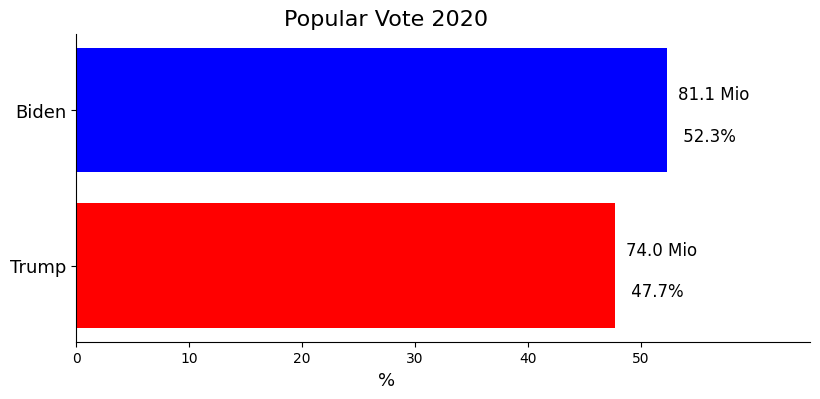

In [159]:
total_votecount=election_total['votes_trump'].sum()+election_total['votes_biden'].sum()
votes_Trump=election_total['votes_trump'].sum()
votes_Biden=election_total['votes_biden'].sum()
plt.barh((0,0.5),[100*election_total['votes_trump'].sum()/total_votecount, 100*election_total['votes_biden'].sum()/total_votecount],color=('red','blue'),height=0.4)
plt.yticks((0,0.5),['Trump','Biden'])
plt.title('Popular Vote 2020',fontsize=16)
plt.gcf().set_size_inches(8,4)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_bounds(0,65)
plt.xlabel('%',fontsize=13)
plt.yticks(fontsize=13)
plt.annotate(str(round(votes_Trump/1000000,1))+' Mio \n \n ' +str(round(100*votes_Trump/total_votecount,1))+'%', xy=(100*votes_Trump/total_votecount+1,-0.1), fontsize=12)
plt.annotate(str(round(votes_Biden/1000000,1))+' Mio \n \n ' +str(round(100*votes_Biden/total_votecount,1))+'%', xy=(100*votes_Biden/total_votecount+1,0.4), fontsize=12)
plt.savefig('PopularVote.png') #save figure before showing!
plt.show()


Let's take each county as an instance, and check the avarage percentages the candidates received in a county.

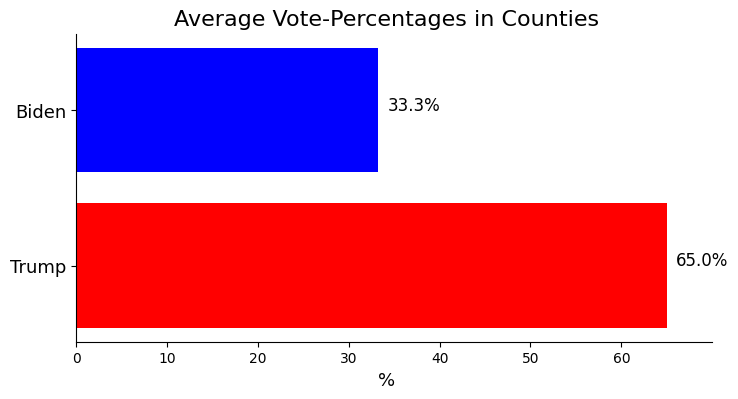

In [196]:
plt.barh((0,0.5),(100*election_total['rel_trump'].mean(),100*election_total['rel_biden'].mean()),color=('red','blue'),height=0.4)
plt.yticks((0,0.5),['Trump','Biden'])
plt.title('Average Vote-Percentages in Counties',fontsize=16)
plt.gcf().set_size_inches(8,4)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_bounds(0,70)
plt.xlabel('%',fontsize=13)
plt.yticks(fontsize=13)
plt.annotate(str(round(100*election_total['rel_trump'].mean(),1))+'%', xy=(100*election_total['rel_trump'].mean()+1,0), fontsize=12)
plt.annotate(str(round(100*election_total['rel_biden'].mean(),1))+'%', xy=(100*election_total['rel_biden'].mean()+1,0.5), fontsize=12)
plt.savefig('RelativeCountyVote.png') #save figure before showing!
plt.show()

Don't be confused by the high numbers for Trump. He had the majority of votes in most counties, however most of them are very small counties, while Biden won large amounts of votes in big cities. Let's see how many counties Trump won, and how many counties Biden won.

In [192]:
countyTrumpWin=[]
for i in range(len(election_total)):
    if election_total.loc[i,'rel_trump']>=election_total.loc[i,'rel_biden']:
        countyTrumpWin.append(1)
    else:
        countyTrumpWin.append(0)
print('Trump won ', sum(countyTrumpWin),' (', round(100*sum(countyTrumpWin)/len(countyTrumpWin),1), '%) counties.')

Trump won  2574  ( 82.7 %) counties.


### Clustering Counties according to venues

Let's get a feeling of how the counties are clustered. Do we have groups of similar counties with regards to the venue categories? We are oing to use kMeans for clustering and the elbow ethod to determine the number of clusters.

First we only need the venue categories to do our clustering. Let's see where the venue categories start in our data frame.

In [52]:
list=election_total.columns
list[0:30]

Index(['fips', 'state', 'county', 'votes_trump', 'votes_biden', 'total',
       'diff', 'rel_trump', 'rel_biden', 'rel_diff', 'unemployment_rate',
       'income_median', 'noHighSchool', 'highSchool', 'someCollege',
       'bachelorMin', 'population', 'age', 'white', 'black', 'asian',
       'hispanic', 'Art Gallery', 'Art Museum', 'Bakery', 'Beach', 'Bookstore',
       'Burger Joint', 'Café', 'Canal'],
      dtype='object')

the first venue is 'Art Gallery' Let's find out which index it has ...

In [55]:
election_total.columns.get_loc('Art Gallery')

22

... and create a new df with venue_categories only.

In [60]:
df_venues=election_total.iloc[:,22:-1]
df_venues.head()

,Art Gallery,Art Museum,Bakery,Beach,Bookstore,Burger Joint,Café,Canal,Climbing Gym,Coffee Shop,...,Duty-free Shop,Bus Station,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza
0,0.02,0.02,0.01,0.09,0.02,0.01,0.01,0.01,0.02,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.01,0.21,0.00,0.00,0.01,0.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can cluster our counties by venue categories.

In [198]:
from sklearn.cluster import KMeans

The number of custers to use is a hard problem in kMeans We are going to look at the decrease in inertia after adding a cluster and determine this way the best way to cluster our data. Inertia is a meassure o how far away data points are from their centroids.

In [233]:
df_venues=pd.read_csv('df_venues.csv')
df_venues.drop(df_venues.columns[0], axis=1,inplace=True)
df_venues.drop(df_venues.columns[-1], axis=1,inplace=True)

In [234]:
inertia=[]
ks=[]
for k in range(1, 11): #we try 10 different values for k.
    # run k-means clustering
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 20)
    k_means.fit(df_venues)
    # determine the model-accuracy
    inertia.append(k_means.inertia_) #inertia is the Sum of squared distances of samples to their closest cluster center. We use this as a badness of fit meassure.
    ks.append(k)
    print(k)

1
2
3
4
5
6
7
8
9
10


Let's create a simple line plot to visualize inertia as dependent of k. Inertia is a value that tells us how close a point is to its centroid. That means we want our inertia to be as small as possible. However since inertia always decreases with higher ks we also don't want too many clusters.

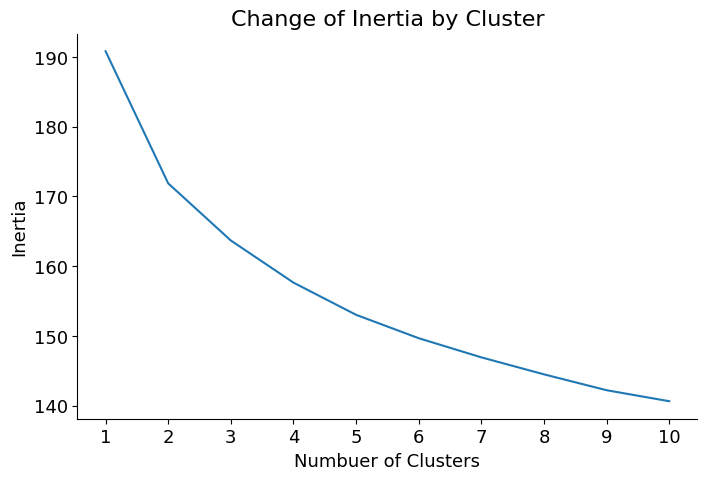

In [235]:
import matplotlib.pyplot as plt
plt.plot(ks, inertia)
plt.title('Change of Inertia by Cluster', size=16)
plt.gcf().set_size_inches(8,5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Numbuer of Clusters', size=13)
plt.ylabel('Inertia', size=13)
plt.xticks(np.arange(min(ks), max(ks)+1, 1.0),fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('ClusterInertia.png')
plt.show()

There is no clear elbow point. There might be one at k=2. Experience from the past labs on coursera showed me, that  after looking at how many data points are assigned to a new cluster we can determine, if we get any meaningful information by adding new clusters. So we are going to see how much more information we get from the inreased number of clusters. We are going to plot the number of counties assigned to the smallest cluster. We want large clusters.

In [236]:
nsmall=[]# we are going to put the count of counties of the smallest cluster into this list.
ks=[]
for k in range(1, 11): #we try 10 different values for k.
    # run k-means clustering
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 20)
    k_means.fit(df_venues)
    # count the number of labes within each luster and give the smallest value.
    labels, counts=np.unique(k_means.labels_,return_counts=True)
    nsmall.append(min(counts))
    ks.append(k)
    print(k)

1
2
3
4
5
6
7
8
9
10


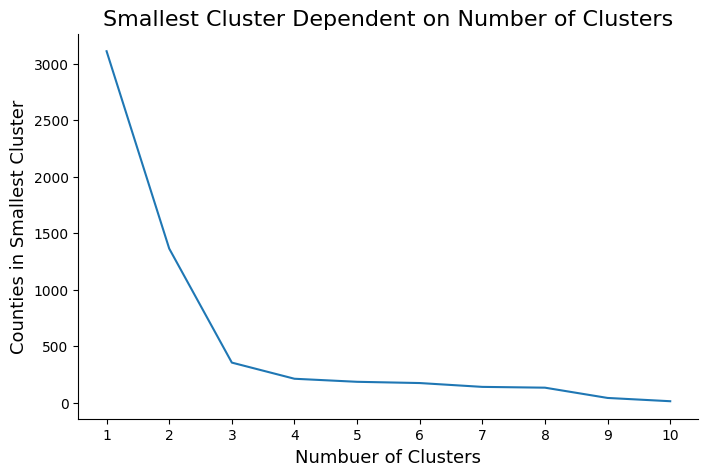

In [237]:
plt.gcf().set_size_inches(8,5)
plt.plot(ks, nsmall)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Numbuer of Clusters', size=13)
plt.ylabel('Counties in Smallest Cluster', size=13)
plt.title('Smallest Cluster Dependent on Number of Clusters', size=16)
plt.xticks(np.arange(min(ks), max(ks)+1, 1.0))
plt.savefig('ClusterSmallest.png')
plt.show()

We have a drastic decline of counties which fall into the third cluster. We are going to use only two clusters for our analysis. Let's check out what diferentiates our clusters. We will append venue df with the labels and see which venues are most frequent within a cluster.

In [80]:
k_means2=KMeans(init = "k-means++", n_clusters = 2, n_init = 20)
k_means2.fit(df_venues)

KMeans(n_clusters=2, n_init=20)

In [109]:
df_venues['cluster']=k_means2.labels_
print('Counties in first cluster: ', np.unique(df_venues['cluster'],return_counts=True)[1][0])
print('Counties in second cluster: ', np.unique(df_venues['cluster'],return_counts=True)[1][1])

Counties in first cluster:  1364
Counties in second cluster:  1748


Let's investigate how our clusters are comprized. We group by cluster and check in which categories there is the largest difference between the groups. 

In [122]:
df_venues_grouped=df_venues.groupby(by='cluster').mean()
df_venues_grouped

,Art Gallery,Art Museum,Bakery,Beach,Bookstore,Burger Joint,Café,Canal,Climbing Gym,Coffee Shop,...,Duty-free Shop,Bus Station,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000125,0.000048,0.002655,0.000510,0.000244,0.008339,0.007289,0.000000,0.000000,0.007738,...,0.00000,0.000137,0.000052,0.000049,0.000000,0.00000,0.000081,0.000000,0.000000,0.000092
1,0.000828,0.001125,0.011218,0.007222,0.003525,0.015258,0.016835,0.000006,0.000143,0.029342,...,0.00007,0.000000,0.000000,0.000000,0.000014,0.00002,0.000000,0.000072,0.000012,0.000000


k_means2=KMeans(init = "k-means++", n_clusters = 2, n_init = 20)
k_means2.fit(df_venues)
df_venues['cluster']=k_means2.labels_
print('Counties in first cluster: ', np.unique(df_venues['cluster'],return_counts=True)[1][0])
print('Counties in second cluster: ', np.unique(df_venues['cluster'],return_counts=True)[1][1])
df_venues_grouped=df_venues.groupby(by='cluster').mean()
df_venues_groupedWe calculate the differences o frequencies of venue categories and append it as a row.

In [130]:
diff=[]
for i in range(len(df_venues_grouped.columns)):
    diff.append(df_venues_grouped.iloc[0,i]-df_venues_grouped.iloc[1,i])

In [131]:
df_venues_grouped.loc[2]=diff
df_venues_grouped

,Art Gallery,Art Museum,Bakery,Beach,Bookstore,Burger Joint,Café,Canal,Climbing Gym,Coffee Shop,...,Duty-free Shop,Bus Station,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000125,0.000048,0.002655,0.000510,0.000244,0.008339,0.007289,0.000000,0.000000,0.007738,...,0.00000,0.000137,0.000052,0.000049,0.000000,0.00000,0.000081,0.000000,0.000000,0.000092
1,0.000828,0.001125,0.011218,0.007222,0.003525,0.015258,0.016835,0.000006,0.000143,0.029342,...,0.00007,0.000000,0.000000,0.000000,0.000014,0.00002,0.000000,0.000072,0.000012,0.000000
2,-0.000703,-0.001076,-0.008563,-0.006712,-0.003281,-0.006919,-0.009546,-0.000006,-0.000143,-0.021604,...,-0.00007,0.000137,0.000052,0.000049,-0.000014,-0.00002,0.000081,-0.000072,-0.000012,0.000092


Let's see which venues have the largest difference between the clusters. Below we can see the top 10 for both clusters.

In [132]:
df_venues_grouped.sort_values(by=2,axis=1, ascending=False)

,Fast Food Restaurant,Discount Store,Sandwich Place,Gas Station,Pizza Place,Pharmacy,Fried Chicken Joint,Big Box Store,Convenience Store,Video Store,...,Trail,Burger Joint,Italian Restaurant,Bakery,Café,Park,Brewery,American Restaurant,Bar,Coffee Shop
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.126717,0.109528,0.074532,0.056975,0.072626,0.024330,0.017990,0.016562,0.035264,0.005896,...,0.002487,0.008339,0.005902,0.002655,0.007289,0.007369,0.001740,0.042490,0.006133,0.007738
1,0.026652,0.021135,0.035229,0.019506,0.042529,0.009592,0.004744,0.003465,0.025631,0.002647,...,0.009317,0.015258,0.013917,0.011218,0.016835,0.017785,0.015859,0.061117,0.024988,0.029342
2,0.100064,0.088394,0.039304,0.037469,0.030097,0.014738,0.013246,0.013097,0.009633,0.003249,...,-0.006830,-0.006919,-0.008015,-0.008563,-0.009546,-0.010417,-0.014119,-0.018627,-0.018856,-0.021604


Cluster 0 is characterized by a high frequency of Fast Food Restaurants, Discount Stores, Sandwich Places and Gas Stations, while cluster 1 is characterized by coffee shops, bars, american restaurants and breweries. Cluster 0 appears to consist of counties with many residential districts, while cluster 1 might ential more places for tourists, going out or commercial areas. I suspect cluster 0 to be more rural areas and cluster 1 to be more metropolitan. Cluster 0 I suppose will turn out to be more in the Trump camp, while cluster 1 might be more in the Biden camp. Let's see if my prediction comes true later on. (I seriously did not write this after analyzing the data, so it's an actual prediction ;))

### Mapping the Clusters

Let's see where the clusters are located. We will use folium.

In [139]:
#First we must join the clusters with our election data.
election_total['cluster']=k_means2.labels_
election_total.head()

,fips,state,county,votes_trump,votes_biden,total,diff,rel_trump,rel_biden,rel_diff,...,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza,Medical Supply Store,cluster
0,6037,California,Los Angeles County,1145530,3028885,4263443,-1883355,0.268687,0.710432,-0.441745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,17031,Illinois,Cook County,558269,1725973,2321399,-1167704,0.240488,0.743506,-0.503017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,48201,Texas,Harris County,700630,918193,1640818,-217563,0.427000,0.559595,-0.132594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4013,Arizona,Maricopa County,995665,1040774,2069475,-45109,0.481120,0.502917,-0.021797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6073,California,San Diego County,600094,964650,1601722,-364556,0.374656,0.602258,-0.227603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Cluster 0 (The one with many fast food restaurants) will be green, and cluster 1 (coffee-shops) will be yellow.

In [ ]:
import folium
import geocoder
map_clusters=folium.Map(location=geocoder.arcgis('USA').latlng,zoom_start=5)
for i in range(len(election_total)):
    county=election_total.loc[i,'county']+', '+election_total.loc[i,'state']
    if election_total.loc[i,'cluster']==0:
        folium.CircleMarker(
            geocoder.arcgis(county).latlng,
            radius=5,
            popup=county,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7).add_to(map_clusters)
    
    else:
        folium.CircleMarker(
            geocoder.arcgis(county).latlng,
            radius=5,
            popup=county,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.7).add_to(map_clusters)
    if (i/50).is_integer(): #This opperation takes a long time, so we want to keep track of how many counties we allready put on the map.
        print(i)

map_clusters

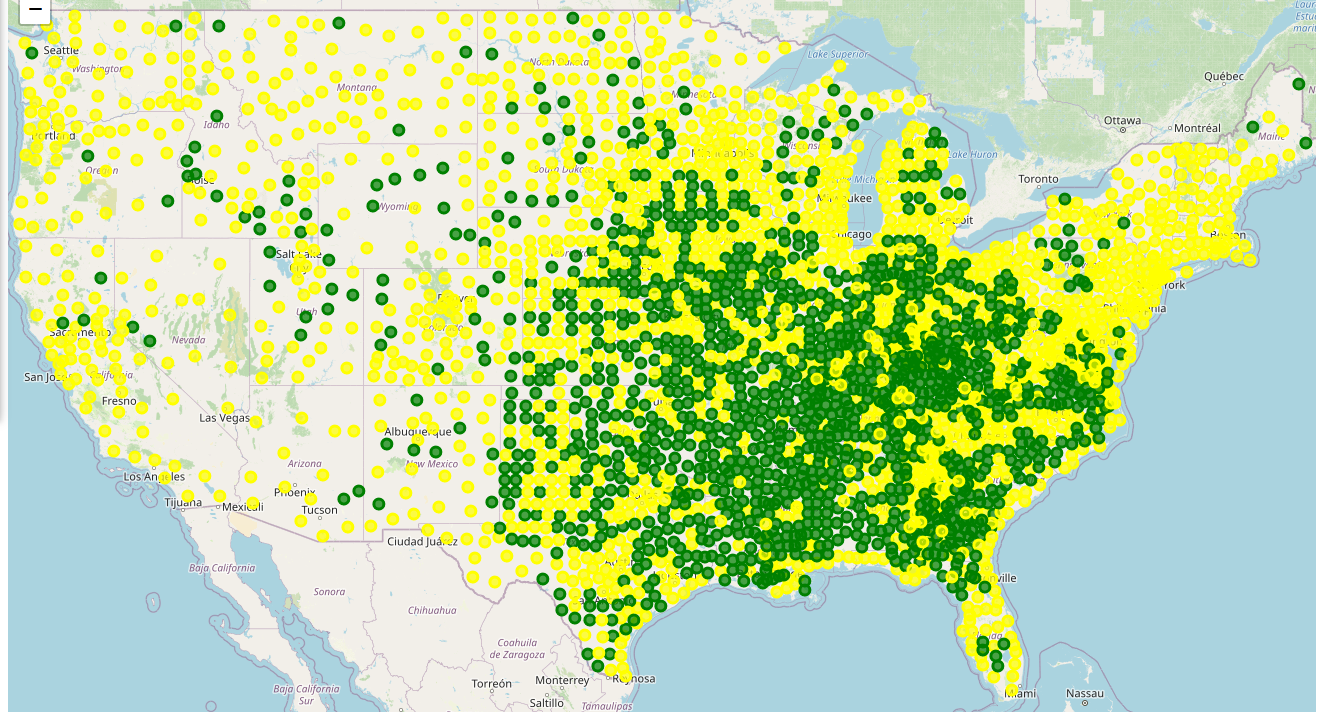

In [13]:
# In the public version of this notebook the map cannot be displayed, so I made a screenshot and display it below by applying the Image function from IPython.display:
from IPython.display import Image
Image(filename='Cluster_Map.png') 

We can see a density of cluster 0 counties in east and sout-east usa - many of these areas belonging in the category of probably rural- red-states. In the north east as well as in the west and on oasts there is a high denisty of cluster 1 counties. Intuitiely we allready see that those are mostly majority-democrat counties.

### Exploring Relationships of Clusters to Other Variables
Let's explore our two clusters more extensively. We want to explore the relationships with our sociodemographic variables. We are explicitly not analyzing election results within the clusters yet, which will be part o our machine-learning and confirmatory statistics section.

In [2]:
#let's get a slice from our dataram with only conisting of the columns for our exploratoryanalysis
df_iv=election_total[election_total.columns[11:23]]
df_iv['cluster']=election_total['cluster']
df_iv.head()

<ipython-input-2-818b9d1a9268>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iv['cluster']=election_total['cluster']


,unemployment_rate,income_median,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic,cluster
0,4.4,67986,21.3,20.7,26.2,31.8,10039107,38.157631,0.707066,0.099772,0.170951,0.486295,1
1,3.8,63347,13.3,23.3,25.4,38.0,5150233,38.493264,0.654355,0.247897,0.087521,0.256160,1
2,3.8,60241,19.1,23.2,26.8,31.0,4713325,35.050518,0.695621,0.208810,0.081153,0.437275,1
3,4.0,65234,12.6,22.6,32.8,32.0,4485414,38.008584,0.827994,0.077035,0.058300,0.314097,1
4,3.2,78777,12.9,18.4,30.6,38.1,3338330,37.931217,0.754086,0.068981,0.152684,0.341498,1


Let' calculate the correlations of all our idependent variables. In the last row, we can see how our custers relate to our other variables.

In [10]:
df_iv.corr()

,unemployment_rate,income_median,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic,cluster
unemployment_rate,1.000000,-0.441034,0.370326,0.253869,-0.154725,-0.356667,-0.053215,0.079849,-0.265438,0.243171,-0.136486,-0.002638,-0.164692
income_median,-0.441034,1.000000,-0.532223,-0.541126,0.088805,0.720741,0.282098,-0.179567,0.169783,-0.231410,0.484682,0.044892,0.387344
noHighSchool,0.370326,-0.532223,1.000000,0.246318,-0.477860,-0.595975,-0.052101,-0.189687,-0.272601,0.317010,-0.155258,0.419223,-0.374062
highSchool,0.253869,-0.541126,0.246318,1.000000,-0.278037,-0.773647,-0.318168,0.274492,0.115783,-0.008294,-0.462273,-0.300273,-0.430732
someCollege,-0.154725,0.088805,-0.477860,-0.278037,1.000000,-0.018758,-0.099560,0.110258,0.185106,-0.243827,-0.096063,-0.083905,0.158321
bachelorMin,-0.356667,0.720741,-0.595975,-0.773647,-0.018758,1.000000,0.332276,-0.142295,-0.007121,-0.072147,0.509255,-0.006881,0.492053
population,-0.053215,0.282098,-0.052101,-0.318168,-0.099560,0.332276,1.000000,-0.179869,-0.164910,0.093833,0.469187,0.195596,0.214272
age,0.079849,-0.179567,-0.189687,0.274492,0.110258,-0.142295,-0.179869,1.000000,0.284927,-0.173800,-0.230538,-0.321063,0.029491
white,-0.265438,0.169783,-0.272601,0.115783,0.185106,-0.007121,-0.164910,0.284927,1.000000,-0.868868,-0.240106,0.037049,0.066616
black,0.243171,-0.231410,0.317010,-0.008294,-0.243827,-0.072147,0.093833,-0.173800,-0.868868,1.000000,0.036328,-0.091250,-0.132390


Cluster 0 is characterized by lower socioeconomic status, lower education, lower population compared with cluster 1. Ethnically cluster 0 is characterized by lower asian population and higher African-American poluation (first actual surprize!), while white and hispanic population is quite evenly distributed. We can see that the most striking difference between the clusters lies in education, followed by income.

## Predicting Election Outcome
In the next section we are going to finally analyse how our clusters predict the election outcome. As we see above, our clusters are substantially correlated to other variables. We are interested if our clusters we obtained from venue-data in foursquare can predict election-outcomes above and beyond the other variables. So in a irst step we are going to create a machine learning model with the socio-democgraphic variables as predictors and election resutls as variable to predict. We are going to apply regression anlysis. We are going to calculate the amount of variance that can be explained by the socioeconomic after that, we are going to include our cluster-variable and again perform our regression. We are going to calculate the explained variance again, and see how much more of the variance in election outcome is explained by adding the cluster-variable. By doing that, we are going to know, if venue-data has additional benefit in explaining the results of the 2020 election, or if the relationship between the composition of counties, when it comes to venues and eletion outcome is soley explained by sociodemographic makeup of the counties.

### Regression Analysis - Predicting Election Outcome with Demographic Data
In the fist step we are going to create a regression model with all our demographic vaiables as independent variables and election results as dependent variable. We are going to have to scale our variables first. As meassure of election outcome, we are going to use the relative votes Presient Trump received.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
demogScale=scaler.fit_transform(df_iv[df_iv.columns[0:len(df_iv.columns)-1]]) #We only scale the continuous variables. Our cluster variable will not be used or the irst regression model.
# Next we put our scaled variables ito our dataframe
df_iv.iloc[:,0:12]=demogScale

Regression coefficients in a multiple linear regression are too hard to intepret, if variables are highly intercorrelated, so are going to create agregate variables for socio-economic status out of unemployment-rate and icome, as well as out of all the different education variable, so we have one easily interpretable variable for them. Since Socio-economic status consists of two variables, we are going to create a mean variable out of them. For education we are going to create a principle component and calculate the socre for each county, so we have one single education variable.

In [ ]:
df_iv['socioeconomic']=(-df_iv['unemployment_rate']+df_iv['income_median'])/2

In [175]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df_iv[['noHighSchool', 'highSchool','someCollege','bachelorMin']])
df_iv['education']=principalComponents
df_iv.head()

<ipython-input-175-79ba34f8e0e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iv['education']=principalComponents


,unemployment_rate,income_median,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic,cluster,socioeconomic,education
0,0.315866,1.105866,1.239491,-1.890554,-0.867751,1.085576,29.664893,-0.851426,-0.879615,-0.024765,4.533950,2.787955,1,0.395000,0.751599
1,-0.115768,0.770567,-0.022264,-1.528661,-1.021448,1.742757,15.065550,-0.747544,-1.211214,0.986832,2.030327,1.135014,1,0.443167,1.540961
2,-0.115768,0.546070,0.892508,-1.542580,-0.752478,1.000778,13.760839,-1.813118,-0.951612,0.719892,1.839232,2.435868,1,0.330919,0.727807
3,0.028110,0.906956,-0.132668,-1.626094,0.400251,1.106775,13.080242,-0.897558,-0.118859,-0.180044,1.153444,1.551145,1,0.439423,1.723873
4,-0.547402,1.885821,-0.085352,-2.210690,-0.022416,1.753356,9.654776,-0.921504,-0.583812,-0.235043,3.985785,1.747952,1,1.216612,2.262763


now we have single variables for socioeconoic status and education. It is important to notice that we woud not do this if we were only interested to apply machine-learning to make decisions. However we want to understand our regression coeficient to mean the ipact of each variable. I f we had not done this, we would have to interpret what an influence of rate of Bachelor-Degrees with constant high-school degrees means. This does not make much sense.

We are going to use linear regression for this project, even though of course we could use poynomial regression. One reason is that our question is largely academic, and so we want to be able to intuitively grasp our results. Results rom polynomial regressions are quite hard to grasp. <br> 
Before we apply our machine learning model, we want to split our data-set into train and test data. we will use 15% of our data-points as test-data.

In [219]:
# First we import train-test split. 
from sklearn.model_selection import train_test_split

#and perform our train test split
X_train, X_test, y_train, y_test = train_test_split(df_iv, election_total['rel_trump'], test_size=0.15)

In [220]:
#create use only the variables we are interested now. Remember, we are oing to include cluster in the later stage.
demog_train=X_train[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic']]
demog_test=X_test[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic']]

In [221]:
#... and train our model.
from sklearn.linear_model import LinearRegression
reg_demog = LinearRegression().fit(demog_train, y_train)

Let's see how much variance of election result is explained by all the demographic variables. We calculate r^2

In [222]:
reg_demog.score(demog_train, y_train)

0.5896556046018673

59% of the variation in election results can be explained by all our demographic variables combined. That is very high! Let's see how well our model fits our test data:

Let's see how well our model fits the test data.

In [223]:
reg_demog.score(demog_test,y_test)

0.560724901359446

Our model fits our test data very well. We only lose an r² of .04 <br> 
Let's check out how well each variable predicts election results. But first I would love to see how each variable correlates with election results.

In [224]:
election_total['socioeconomic']=df_iv['socioeconomic']
election_total['education']=df_iv['education']
election_total[['rel_trump','socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic']].corr()

,rel_trump,socioeconomic,education,population,age,white,black,asian,hispanic
rel_trump,1.000000,-0.091495,-0.406682,-0.357115,0.213603,0.548838,-0.451271,-0.450818,-0.132372
socioeconomic,-0.091495,1.000000,0.632241,0.197514,-0.152807,0.256364,-0.279549,0.365895,0.027997
education,-0.406682,0.632241,1.000000,0.242928,-0.067025,0.087912,-0.185670,0.400948,-0.055646
population,-0.357115,0.197514,0.242928,1.000000,-0.179869,-0.164910,0.093833,0.469187,0.195596
age,0.213603,-0.152807,-0.067025,-0.179869,1.000000,0.284927,-0.173800,-0.230538,-0.321063
white,0.548838,0.256364,0.087912,-0.164910,0.284927,1.000000,-0.868868,-0.240106,0.037049
black,-0.451271,-0.279549,-0.185670,0.093833,-0.173800,-0.868868,1.000000,0.036328,-0.091250
asian,-0.450818,0.365895,0.400948,0.469187,-0.230538,-0.240106,0.036328,1.000000,0.165427
hispanic,-0.132372,0.027997,-0.055646,0.195596,-0.321063,0.037049,-0.091250,0.165427,1.000000


We see that Trump got more votes in counties with high percentage of white-population, low African-American population, low asian population, lower education levels, smaller population-size, and lower socio-economic status. <br>
Because these variables are correlated, let's see which variables are critical for predicting the election outcome. In multiple regression, the intercorrelation of predictor variables is partialed out, so we can actually see which variables are the most significant ones. Let's take a look at the regression coefficients.

In [225]:
pd.DataFrame(reg_demog.coef_, columns=['regression coefficients'],index=demog_train.columns)

,regression coefficients
socioeconomic,0.032908
education,-0.054192
population,-0.011808
age,-0.003363
white,0.048568
black,-0.038481
asian,-0.030557
hispanic,-0.026901


The regression coefficients mean the win or loss in relative Trump votes, when the predictor changes by 1 standard deviation while all other predictors remain costant. So this is the isolated effect of a variable on Trump votes. We ca see that the best predictor is education - the lower the education in a county the more votes Trump received. When education-level within a county increases by 1 sd, Trump loses 5.4% of votes.  Second is White-population. When white population increases by 1sd, Trump gains 4.9% of votes. Third is African-American population with a decrease in Trump-votes by 3.8% per sd. Third is socioeconomic status - Trump actually gains 3.2% with a change in 1sd. This is a very intriguing result, because in the correlation table above, we saw that Trump votes were negatively correlated with socioeconomi status. This is because SES is correlate with the other variables, especially with education. We can see that education helps Biden, but wealth and being emploed actually help Trump. As little surprize - the proportion of non-white people leads to a decrease in Trump votes by 2.7 to 3%. The population-size itself decreased Trump votes by 1.1% - which is only a small influence. We seee that a lot of the influnce it used to have disappears when controlling for all the other demoraphic variables.

### Regression Analysis - Predicting Election Outcome with Venue-Data
Finally the moment we have all been waiting for. We want to see if and in what way our venue-data represented by our two cluster can additionally predict our election outcomes. We are simply going to include the cluster variable as predictor variable, fit the model again and check how much our R² inreases. But first, let's see how the election went in the two clusters, before controlling for the influence of the other variables.

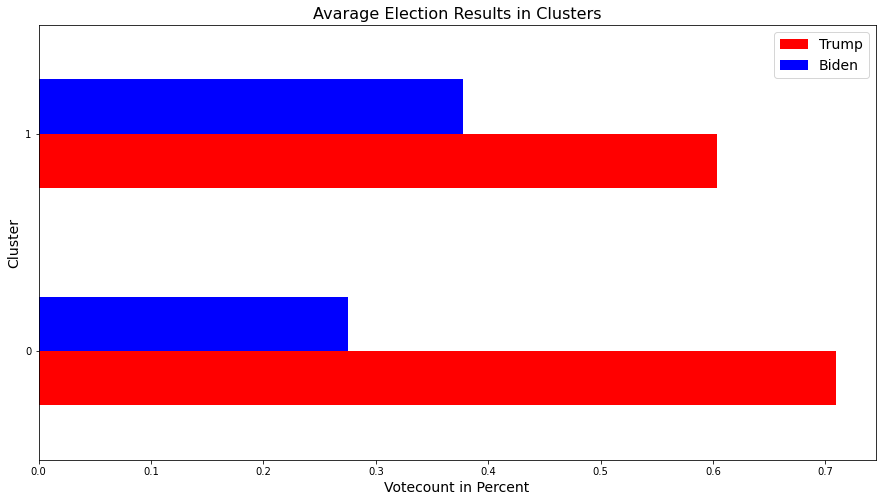

In [308]:
from matplotlib import pyplot as plt
pd_cluster=election_total[['rel_trump','rel_biden','cluster']].groupby(['cluster']).mean()
pd_cluster['rel_trump'],pd_cluster['rel_biden']=pd_cluster['rel_trump']*100,pd_cluster['rel_biden']*100
pd_cluster.plot(kind='barh', figsize=(15,8),color=['red','blue'])
plt.xlabel('Votecount in Percent', fontsize=14)
plt.ylabel('Cluster',fontsize = 14)
plt.legend(['Trump', 'Biden'],fontsize=14)
plt.title('Avarage Election Results in Clusters', size=16)
plt.show()

Don't be confused with this chart, I thought I did something wrong! This shows Trump being far ahead in most counties. This is true! Biden won the large counties, and Trump won almost all of the small ones. The chart below will show you the combine the total votes in each cluster:

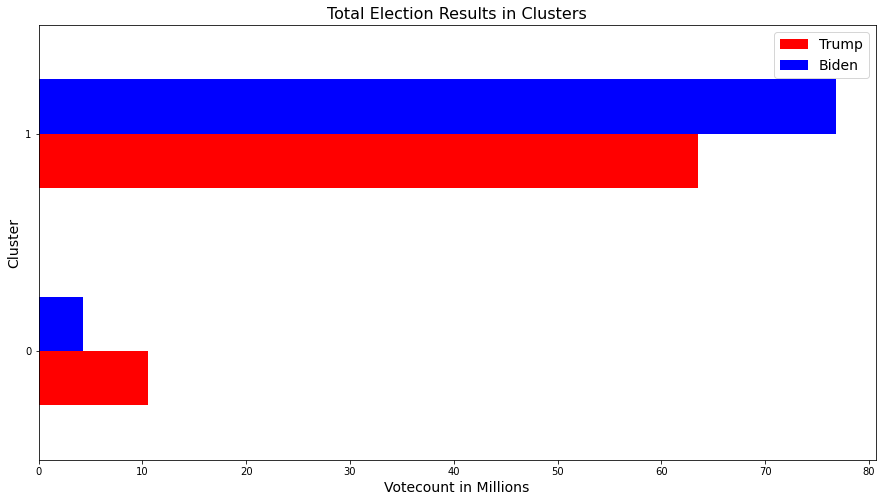

In [310]:
pd_cluster_tot=election_total[['votes_trump','votes_biden','cluster']].groupby(['cluster']).sum()
pd_cluster_tot['votes_trump'],pd_cluster_tot['votes_biden']=pd_cluster_tot['votes_trump']/1000000,pd_cluster_tot['votes_biden']/1000000
pd_cluster_tot.plot(kind='barh', figsize=(15,8),color=['red','blue'])
plt.xlabel('Votecount in Millions', fontsize=14)
plt.ylabel('Cluster',fontsize = 14)
plt.legend(['Trump', 'Biden'],fontsize=14)
plt.title('Total Election Results in Clusters', size=16)
plt.show()

We can see that cluster 0 is largely voting for Trump, while cluster 1 prefers Biden. We can assume that all of the large cities are in cluster 1. <br>
Let's see how well our venues explain election-results above and beyond sociodemographic variables.

In [234]:
venue_train=X_train[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic','cluster']]
venue_test=X_test[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic','cluster']]

In [235]:
reg_venue = LinearRegression().fit(venue_train, y_train)

Let's repeat our analyses from above. First let's check our within train R²:

In [236]:
reg_venue.score(venue_train,y_train)

0.6002647915638651

In [237]:
print('Additionally explained variance by clusters in the training data-set:', reg_venue.score(venue_train,y_train)- reg_demog.score(demog_train,y_train))

Additionally explained variance by clusters in the training data-set: 0.010609186961997863


This is 'only' 1.1% additionally explained variance. Let's see what the r² is in the test-data:

In [238]:
reg_venue.score(venue_test,y_test)

0.584446944519412

In [239]:
print('Additionally explained variance by clusters in the test data-set:', reg_venue.score(venue_test,y_test)- reg_demog.score(demog_test,y_test))

Additionally explained variance by clusters in the test data-set: 0.023722043159966066


This is a lot more. 2.4%. Let's use our whole data-set for our final analysis and look at the regression-weights to see how our cluster-variable compares to the other variables when it comes to explaining power.

In [247]:
X_total=df_iv[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic','cluster']]
y_total=election_total['rel_trump']

In [248]:
reg_total=LinearRegression().fit(X_total,y_total)
reg_total.score(X_total,y_total)

0.5987771128008765

In [249]:
pd.DataFrame(reg_total.coef_, columns=['regression coefficients'],index=X_total.columns).round(3)

,regression coefficients
socioeconomic,0.030
education,-0.047
population,-0.013
age,-0.002
white,0.047
black,-0.041
asian,-0.026
hispanic,-0.023
cluster,-0.043


Our cluster variable actually explains the elction outcome quite well, even when the other variables are controlled for. President Trump received 4.3% more of the votes in cluster 0 when all other variables are controlled for - even population-size. We can see that the makeup of the venues explains a significant portion of the election results which has nothing to do with population-size.

### Fast Food Restaurants and Discount Stores vs. Coffee-Shops and Bars
Because our clusters are quite abstract, I want to include four specific venue types in our analysis which showed to be most prominent in the clusters. Remember: Cluster 0 was chracterized by a higher proportion of Fast Food Restaurants and Discount-Stores, while Cluster 1 entailed a higher propoertion of Coffee-Shops and Bars. <br>
We are going to do the same anlysis as we just did, just with the proportion of the fou venue types instead of the cluster variables. So we must include those variables into our dataset, and standardize them, before we peform our regression analysis.

In [317]:
#let's transform our venue data and put them into a data frame...
venue_spec=scaler.fit_transform(election_total[['Fast Food Restaurant', 'Discount Store','Coffee Shop', 'Bar']])
venue_spec=pd.DataFrame(data=venue_spec, columns=['Fast Food Restaurant', 'Discount Store','Coffee Shop', 'Bar'])

In [326]:
#... and put all variables which we need together.
X=pd.concat([df_iv[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic']],venue_spec], axis=1, join='inner')

In [336]:
reg_venue_spec=LinearRegression().fit(X,y_total)
print('R²= ',reg_venue_spec.score(X,y_total).round(3))

R²=  0.609


Our model fits slightly better than when we use the clusters. Let's see the coefficients our venues bring us.

In [337]:
pd.DataFrame(reg_venue_spec.coef_, columns=['regression coefficients'],index=X.columns).round(3)

,regression coefficients
socioeconomic,0.029
education,-0.042
population,-0.013
age,-0.003
white,0.049
black,-0.042
asian,-0.025
hispanic,-0.023
Fast Food Restaurant,0.016
Discount Store,0.008


Trump gains 1.6% in counties with an increased fast food restaurant frequeny of 1 sd, and Biden does the same (1.5%) when the frequency of Coffee Shops is increased by 1 sd. Discount store generate and extra 0.8% for Trump and Bars an extra 0.7% for Biden. These numbers sound small, but are actually quite significant when election results are close. <br>

## Analyzig Large Counties
We analyzed all of the counties. Now it's finally time to answer the initial question - Are there predictors within the large counties, which help us understand the election results. <br> 
First we must decide the population size by which to definea counties as large. We are going to use the proposed minimum population of 50000 to define a city as proposed by the [UN](https://unstats.un.org/unsd/statcom/51st-session/documents/BG-Item3j-Recommendation-E.pdf). <br> 
We will have to repeat the clustering, because the clusters largely depend on the counties we ued to derive the clusters from.

In [3]:
#get data from counties with more than 50000 inhabitants.
df_cities=election_total[election_total['population']>50000]
df_cities.shape

(986, 616)

Our dataset consists of 986 counties. Let's cluster this dataset as we did with the full data.

In [13]:
# Let's take only the venue data.
city_venues=df_cities.iloc[:,22:]
city_venues.head()

,Art Gallery,Art Museum,Bakery,Beach,Bookstore,Burger Joint,Café,Canal,Climbing Gym,Coffee Shop,...,Bus Station,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza,Medical Supply Store
0,0.02,0.02,0.01,0.09,0.02,0.01,0.01,0.01,0.02,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,0.01,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.01,0.21,0.00,0.00,0.01,0.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Clustering Cities by Venues
Let's repeat all the analyses we did before, beginning with clustering.

In [ ]:
from sklearn.cluster import KMeans
inertia=[]
ks=[]
for k in range(1, 21): #we try 20 different values for k.
    # run k-means clustering
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 20)
    k_means.fit(city_venues)
    # determine the model-accuracy
    inertia.append(k_means.inertia_) #inertia is the Sum of squared distances of samples to their closest cluster center. We use this as a badness of fit meassure.
    ks.append(k)
    print(k)

Let's see how our inertia changes with increased ks. Mayb we can find an elbow point this time. Remember inertia measures the distane to the closest centroid. A large decline in inertia means rapid decline in added value by an additional cluster.

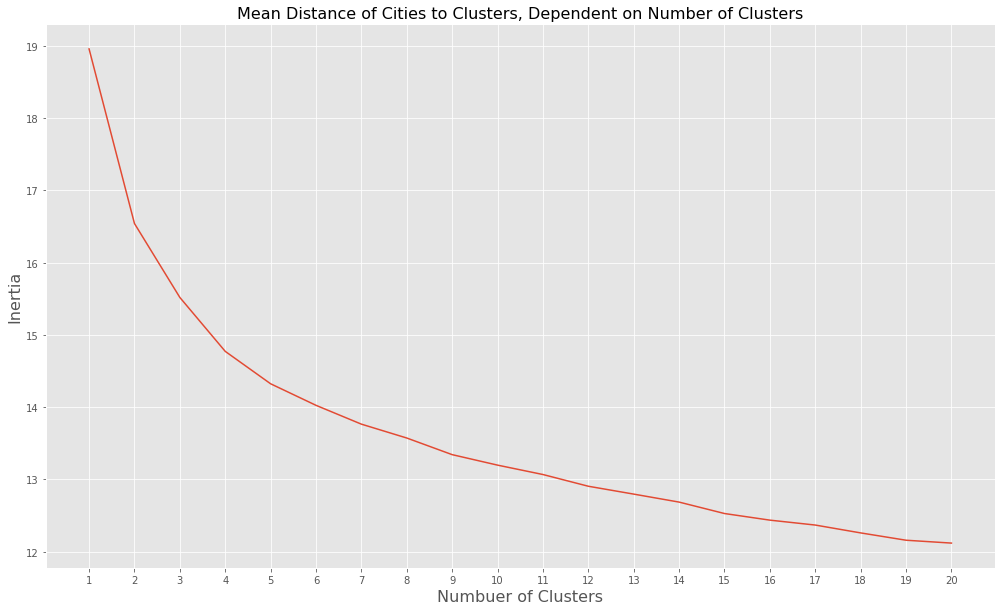

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 10))
plt.style.use('ggplot')
plt.plot(ks, inertia)
plt.xlabel('Numbuer of Clusters', size=16)
plt.ylabel('Inertia', size=16)
plt.title('Mean Distance of Cities to Clusters, Dependent on Number of Clusters', size=16)
plt.xticks(np.arange(min(ks), max(ks)+1, 1.0))
plt.show()

This figue looks very similar to the one with the full data set. We are again probably ging to receive two clusters. Let's see how size of cluster changes with increased k.

1
2
3
4
5
6
7
8
9
10


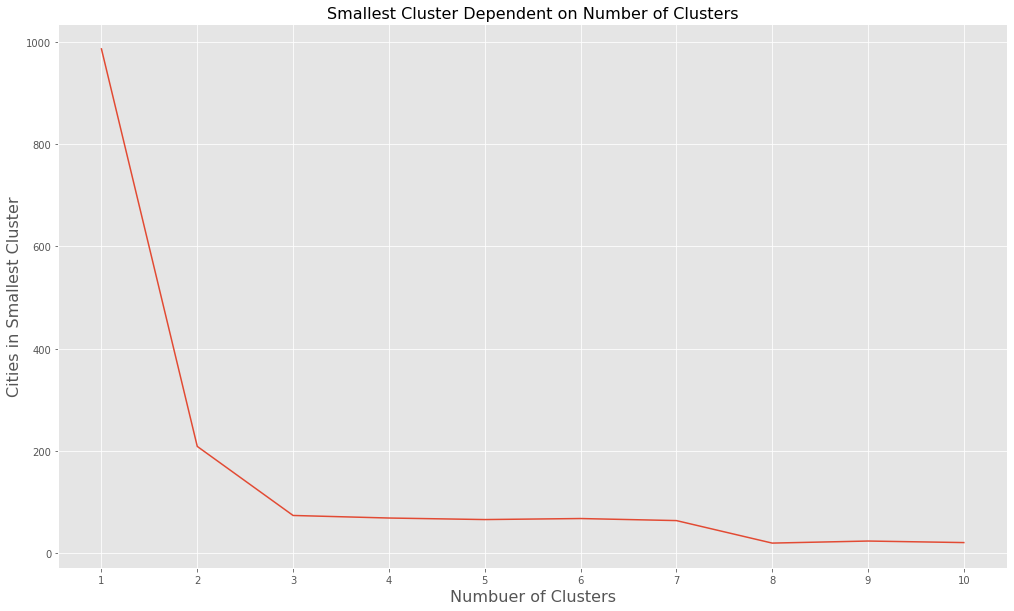

In [17]:
nsmall=[]# we are going to put the count of cities of the smallest cluster into this list.
ks=[]
for k in range(1, 11): #we try 10 different values for k.
    # run k-means clustering
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 20)
    k_means.fit(city_venues)
    # count the number of labes within each luster and give the smallest value.
    labels, counts=np.unique(k_means.labels_,return_counts=True)
    nsmall.append(min(counts))
    ks.append(k)
    print(k)
plt.figure(figsize=(17, 10))
plt.style.use('ggplot')
plt.plot(ks, nsmall)
plt.xlabel('Numbuer of Clusters', size=16)
plt.ylabel('Cities in Smallest Cluster', size=16)
plt.title('Smallest Cluster Dependent on Number of Clusters', size=16)
plt.xticks(np.arange(min(ks), max(ks)+1, 1.0))
plt.show()

As before the third cluster becomes very small. - aproximately 80 cities. With two clusters we have 200 and 800 apr.

In [30]:
k_means2=KMeans(init = "k-means++", n_clusters = 2, n_init = 20)
k_means2.fit(city_venues)
city_venues['cluster']=k_means2.labels_
print('Counties in first cluster: ', np.unique(city_venues['cluster'],return_counts=True)[1][0])
print('Counties in second cluster: ', np.unique(city_venues['cluster'],return_counts=True)[1][1])
city_venues_grouped=city_venues.groupby(by='cluster').mean()
city_venues_grouped

Counties in first cluster:  209
Counties in second cluster:  777


,Art Gallery,Art Museum,Bakery,Beach,Bookstore,Burger Joint,Café,Canal,Climbing Gym,Coffee Shop,...,Bus Station,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza,Medical Supply Store
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000183,0.000132,0.005038,0.000740,0.001422,0.016150,0.007861,0.000000,0.000000,0.020373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001332,0.001994,0.017447,0.012611,0.006509,0.016787,0.015519,0.000013,0.000322,0.040817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
diff=[]
for i in range(len(city_venues_grouped.columns)):
    diff.append(city_venues_grouped.iloc[0,i]-city_venues_grouped.iloc[1,i])

In [32]:
city_venues_grouped.loc[2]=diff
city_venues_grouped

,Art Gallery,Art Museum,Bakery,Beach,Bookstore,Burger Joint,Café,Canal,Climbing Gym,Coffee Shop,...,Bus Station,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza,Medical Supply Store
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000183,0.000132,0.005038,0.000740,0.001422,0.016150,0.007861,0.000000,0.000000,0.020373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001332,0.001994,0.017447,0.012611,0.006509,0.016787,0.015519,0.000013,0.000322,0.040817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.001148,-0.001861,-0.012409,-0.011871,-0.005086,-0.000637,-0.007658,-0.000013,-0.000322,-0.020443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's see which venues have the largest difference between the clusters. Below we can see the top 10 for both clusters.

In [33]:
city_venues_grouped.sort_values(by=2,axis=1, ascending=False)

,Discount Store,Fast Food Restaurant,Sandwich Place,Pharmacy,Gas Station,Pizza Place,Convenience Store,Fried Chicken Joint,Video Store,Video Game Store,...,Seafood Restaurant,Café,Trail,Italian Restaurant,Bar,Beach,Bakery,Park,Brewery,Coffee Shop
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.085018,0.069749,0.062286,0.033686,0.028766,0.060592,0.019370,0.014749,0.009246,0.009216,...,0.009456,0.007861,0.001746,0.012511,0.012629,0.000740,0.005038,0.006912,0.004584,0.020373
1,0.005565,0.025009,0.021474,0.006769,0.005040,0.039657,0.007944,0.004489,0.000924,0.001630,...,0.016132,0.015519,0.010391,0.022161,0.022296,0.012611,0.017447,0.025063,0.022909,0.040817
2,0.079453,0.044740,0.040812,0.026916,0.023726,0.020936,0.011426,0.010261,0.008323,0.007586,...,-0.006676,-0.007658,-0.008645,-0.009650,-0.009668,-0.011871,-0.012409,-0.018151,-0.018325,-0.020443


Our clusters appear quite similar as with the entire data set. Cluster 0 again consists of cities with high denisty of dicount stores and fast food restaurants, while cluster 1 consists of cities with high density in coffee shops and this time breweries.

In [34]:
#First we must join the clusters with our election data.
df_cities['cluster']=k_means2.labels_
df_cities.head()

<ipython-input-34-ff46bf6208be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities['cluster']=k_means2.labels_


,fips,state,county,votes_trump,votes_biden,total,diff,rel_trump,rel_biden,rel_diff,...,Baby Store,Assisted Living,Tram Station,Airport Food Court,Dairy Store,Tech Startup,Bus Stop,Toll Plaza,Medical Supply Store,cluster
0,6037,California,Los Angeles County,1145530,3028885,4263443,-1883355,0.268687,0.710432,-0.441745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,17031,Illinois,Cook County,558269,1725973,2321399,-1167704,0.240488,0.743506,-0.503017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,48201,Texas,Harris County,700630,918193,1640818,-217563,0.427000,0.559595,-0.132594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4013,Arizona,Maricopa County,995665,1040774,2069475,-45109,0.481120,0.502917,-0.021797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6073,California,San Diego County,600094,964650,1601722,-364556,0.374656,0.602258,-0.227603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Exploring Relationships of Clusters to Other Variables
Let's explore our two clusters more extensively. We want to explore the relationships with our sociodemographic variables. We are explicitly not analyzing election results within the clusters yet, which will be part o our machine-learning and confirmatory statistics section.

In [35]:
#let's get a slice from our dataframe with only conisting of the columns for our exploratoryanalysis
city_iv=df_cities[df_cities.columns[10:22]]
city_iv['cluster']=df_cities['cluster']
city_iv.head()

<ipython-input-35-de4da0941b54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_iv['cluster']=df_cities['cluster']


,unemployment_rate,income_median,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic,cluster
0,4.4,67986,21.3,20.7,26.2,31.8,10039107,38.157631,0.707066,0.099772,0.170951,0.486295,1
1,3.8,63347,13.3,23.3,25.4,38.0,5150233,38.493264,0.654355,0.247897,0.087521,0.256160,1
2,3.8,60241,19.1,23.2,26.8,31.0,4713325,35.050518,0.695621,0.208810,0.081153,0.437275,1
3,4.0,65234,12.6,22.6,32.8,32.0,4485414,38.008584,0.827994,0.077035,0.058300,0.314097,1
4,3.2,78777,12.9,18.4,30.6,38.1,3338330,37.931217,0.754086,0.068981,0.152684,0.341498,1


Let' calculate the correlations of all our idependent variables. In the last row, we can see how our custers relate to our other variables.

In [36]:
city_iv.corr()

,unemployment_rate,income_median,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic,cluster
unemployment_rate,1.000000,-0.407281,0.473037,0.283343,0.092683,-0.457104,-0.053389,0.051540,-0.049543,0.037600,-0.165987,0.272613,-0.159779
income_median,-0.407281,1.000000,-0.486648,-0.554267,-0.248090,0.711710,0.210191,-0.076533,0.020549,-0.170906,0.482992,0.021609,0.309864
noHighSchool,0.473037,-0.486648,1.000000,0.254759,-0.112381,-0.603044,0.066545,-0.179829,-0.153045,0.166176,-0.131309,0.588614,-0.329580
highSchool,0.283343,-0.554267,0.254759,1.000000,0.030959,-0.799195,-0.308685,0.332872,0.244966,-0.079875,-0.465414,-0.269073,-0.454126
someCollege,0.092683,-0.248090,-0.112381,0.030959,1.000000,-0.406377,-0.197881,0.017418,0.112794,-0.101891,-0.220476,-0.059885,-0.028384
bachelorMin,-0.457104,0.711710,-0.603044,-0.799195,-0.406377,1.000000,0.259440,-0.141036,-0.137858,0.017500,0.468618,-0.080106,0.472692
population,-0.053389,0.210191,0.066545,-0.308685,-0.197881,0.259440,1.000000,-0.130617,-0.243274,0.124702,0.389774,0.304147,0.209997
age,0.051540,-0.076533,-0.179829,0.332872,0.017418,-0.141036,-0.130617,1.000000,0.294916,-0.229895,-0.166951,-0.332784,-0.078796
white,-0.049543,0.020549,-0.153045,0.244966,0.112794,-0.137858,-0.243274,0.294916,1.000000,-0.856860,-0.400075,-0.017940,-0.090347
black,0.037600,-0.170906,0.166176,-0.079875,-0.101891,0.017500,0.124702,-0.229895,-0.856860,1.000000,0.013044,-0.086497,0.026087


Cluster 0 is characterized by lower socioeconomic status, lower education, lower population compared with cluster 1. Ethnically cluster 1 is characterized by higher asian population, while cluster 0 has a higher white populatio. We can see that again the most striking difference between the clusters lies in education, followed by income.

## Predicting Election Outcome
In the next section we are going to finally analyse how our clusters predict the election outcome. As we see above, our clusters are substantially correlated to other variables. We are interested if our clusters we obtained from venue-data in foursquare can predict election-outcomes above and beyond the other variables. So in a irst step we are going to create a machine learning model with the socio-democgraphic variables as predictors and election resutls as variable to predict. We are going to apply regression anlysis. We are going to calculate the amount of variance that can be explained by the socioeconomic after that, we are going to include our cluster-variable and again perform our regression. We are going to calculate the explained variance again, and see how much more of the variance in election outcome is explained by adding the cluster-variable. By doing that, we are going to know, if venue-data has additional benefit in explaining the results of the 2020 election, or if the relationship between the composition of counties, when it comes to venues and eletion outcome is soley explained by sociodemographic makeup of the counties.

### Regression Analysis - Predicting Election Outcome with Demographic Data
In the fist step we are going to create a regression model with all our demographic vaiables as independent variables and election results as dependent variable. We are going to have to scale our variables first. As meassure of election outcome, we are going to use the relative votes Presient Trump received.

In [38]:
city_iv.head()

,unemployment_rate,income_median,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic,cluster
0,4.4,67986,21.3,20.7,26.2,31.8,10039107,38.157631,0.707066,0.099772,0.170951,0.486295,1
1,3.8,63347,13.3,23.3,25.4,38.0,5150233,38.493264,0.654355,0.247897,0.087521,0.256160,1
2,3.8,60241,19.1,23.2,26.8,31.0,4713325,35.050518,0.695621,0.208810,0.081153,0.437275,1
3,4.0,65234,12.6,22.6,32.8,32.0,4485414,38.008584,0.827994,0.077035,0.058300,0.314097,1
4,3.2,78777,12.9,18.4,30.6,38.1,3338330,37.931217,0.754086,0.068981,0.152684,0.341498,1


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
demogScale=scaler.fit_transform(city_iv[city_iv.columns[0:len(city_iv.columns)-1]]) #We only scale the continuous variables. Our cluster variable will not be used or the irst regression model.
# Next we put our scaled variables ito our dataframe
city_iv.iloc[:,0:12]=demogScale

d:\program files\python\python39\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Regression coefficients in a multiple linear regression are too hard to intepret, if variables are highly intercorrelated, so are going to create agregate variables for socio-economic status out of unemployment-rate and icome, as well as out of all the different education variable, so we have one easily interpretable variable for them. Since Socio-economic status consists of two variables, we are going to create a mean variable out of them. For education we are going to create a principle component and calculate the socre for each county, so we have one single education variable.

In [40]:
city_iv['socioeconomic']=(-city_iv['unemployment_rate']+city_iv['income_median'])/2

<ipython-input-40-60446b1cd57e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_iv['socioeconomic']=(-city_iv['unemployment_rate']+city_iv['income_median'])/2


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(city_iv[['noHighSchool', 'highSchool','someCollege','bachelorMin']])
city_iv['education']=principalComponents
city_iv.head()

<ipython-input-41-f0a7ee1c4479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_iv['education']=principalComponents


,unemployment_rate,income_median,noHighSchool,highSchool,someCollege,bachelorMin,population,age,white,black,asian,hispanic,cluster,socioeconomic,education
0,0.495540,0.444396,1.947015,-1.308539,-0.960640,0.347491,17.724537,-0.460842,-0.764590,-0.183914,2.520136,2.649639,1,-0.025572,0.292855
1,0.003741,0.153649,0.359455,-0.931455,-1.135084,0.942895,8.834226,-0.346910,-1.134902,0.973573,0.925182,0.986554,1,0.074954,1.223780
2,0.003741,-0.041018,1.510436,-0.945959,-0.829806,0.270665,8.039718,-1.515569,-0.844992,0.668136,0.803444,2.295391,1,-0.022379,0.206693
3,0.167674,0.271916,0.220544,-1.032978,0.478529,0.366698,7.625267,-0.511437,0.084983,-0.361587,0.366557,1.405239,1,0.052121,0.625621
4,-0.488058,1.120717,0.280077,-1.642112,-0.001194,0.952498,5.539319,-0.537700,-0.434252,-0.424517,2.170923,1.603254,1,0.804387,1.429614


now we have single variables for socioeconoic status and education. It is important to notice that we woud not do this if we were only interested to apply machine-learning to make decisions. However we want to understand our regression coeficient to mean the ipact of each variable. I f we had not done this, we would have to interpret what an influence of rate of Bachelor-Degrees with constant high-school degrees means. This does not make much sense.

We are going to use linear regression for this project, even though of course we could use poynomial regression. One reason is that our question is largely academic, and so we want to be able to intuitively grasp our results. Results rom polynomial regressions are quite hard to grasp. <br> 
Before we apply our machine learning model, we want to split our data-set into train and test data. we will use 15% of our data-points as test-data.

In [42]:
# First we import train-test split. 
from sklearn.model_selection import train_test_split

#and perform our train test split
X_train, X_test, y_train, y_test = train_test_split(city_iv, df_cities['rel_trump'], test_size=0.15)

In [43]:
#create use only the variables we are interested now. Remember, we are oing to include cluster in the later stage.
demog_train=X_train[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic']]
demog_test=X_test[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic']]

In [44]:
#... and train our model.
from sklearn.linear_model import LinearRegression
reg_demog = LinearRegression().fit(demog_train, y_train)

Let's see how much variance of election result is explained by all the demographic variables. We calculate r^2

In [45]:
reg_demog.score(demog_train, y_train)

0.6654597225277297

67% of the variation in election results can be explained by all our demographic variables combined. That is very high! Let's see how well our model fits our test data:

Let's see how well our model fits the test data.

In [46]:
reg_demog.score(demog_test,y_test)

0.646857438171619

Our model fits our test data very well.<br> 
Let's check out how well each variable predicts election results. But first I would love to see how each variable correlates with election results.

In [47]:
df_cities['socioeconomic']=city_iv['socioeconomic']
df_cities['education']=city_iv['education']
df_cities[['rel_trump','socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic']].corr()

<ipython-input-47-25ffa0411b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities['socioeconomic']=city_iv['socioeconomic']
<ipython-input-47-25ffa0411b9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities['education']=city_iv['education']


,rel_trump,socioeconomic,education,population,age,white,black,asian,hispanic
rel_trump,1.000000,-0.214787,-0.597744,-0.378441,0.185762,0.505589,-0.351244,-0.485317,-0.201214
socioeconomic,-0.214787,1.000000,0.705105,0.157111,-0.076340,0.041779,-0.124284,0.386834,-0.149615
education,-0.597744,0.705105,1.000000,0.241641,-0.137898,-0.124562,0.002157,0.458463,-0.103797
population,-0.378441,0.157111,0.241641,1.000000,-0.130617,-0.243274,0.124702,0.389774,0.304147
age,0.185762,-0.076340,-0.137898,-0.130617,1.000000,0.294916,-0.229895,-0.166951,-0.332784
white,0.505589,0.041779,-0.124562,-0.243274,0.294916,1.000000,-0.856860,-0.400075,-0.017940
black,-0.351244,-0.124284,0.002157,0.124702,-0.229895,-0.856860,1.000000,0.013044,-0.086497
asian,-0.485317,0.386834,0.458463,0.389774,-0.166951,-0.400075,0.013044,1.000000,0.170028
hispanic,-0.201214,-0.149615,-0.103797,0.304147,-0.332784,-0.017940,-0.086497,0.170028,1.000000


We see that Trump got more votes in cities with high percentage of white-population, low African-American population, low asian population, lower education levels, smaller population-size, and lower socio-economic status. <br>
Because these variables are correlated, let's see which variables are critical for predicting the election outcome. In multiple regression, the intercorrelation of predictor variables is partialed out, so we can actually see which variables are the most significant ones. Let's take a look at the regression coefficients.

In [48]:
pd.DataFrame(reg_demog.coef_, columns=['regression coefficients'],index=demog_train.columns)

,regression coefficients
socioeconomic,0.050842
education,-0.076399
population,-0.009913
age,-0.015683
white,0.047619
black,-0.014972
asian,-0.010918
hispanic,-0.037253


The regression coefficients mean the win or loss in relative Trump votes, when the predictor changes by 1 standard deviation while all other predictors remain costant. So this is the isolated effect of a variable on Trump votes. We ca see that the best predictor again is education - the lower the education in a county the more votes Trump received. When education-level within a county increases by 1 sd, Trump loses 7.6% of votes. Education is even a larger influence than in all of the US.
<br>Second is socioeconomic status - Trump actually gains 5.1% with a change in 1sd. This is a very intriguing result, because in the correlation table above, we saw that Trump votes were negatively correlated with socioeconomi status. This is because SES is correlate with the other variables, especially with education. We can see that education helps Biden, but wealth and being emploed actually help Trump. Third is white-population. When white population increases by 1sd, Trump gains 4.8% of votes. Fourth is Hispanic population with a decrease in Trump-votes by 3.7% per sd, while african-american population does not have a major influene anymore. <br>
We can see that population-size hardly had any influence on the elction-results < 1%.

What realy impresses me about these results is the effect o socioeconomic status. Again as shown in the correlation table above, Trump-votes decrease with higher socioeconomic status. BUT when we control for education, Trump votes dramatically increase with socioeconomic status. We can see that a university education atually dramatically influences the efect of income/emplyoement on voting behavior, even to change the direction o the effect! It shows that Democrats are doing a very good job with influencing voting behavior of wealthy people through college-education (directly or indirectly) as to even go against their own self-interests - remember the Republican party and Trump cutting taxes.

### Regression Analysis - Predicting Election Outcome with Venue-Data
Finally the moment we have all been waiting for. We want to see if and in what way our venue-data represented by our two cluster can additionally predict our election outcomes. We are simply going to include the cluster variable as predictor variable, fit the model again and check how much our R² inreases. But first, let's see how the election went in the two clusters, before controlling for the influence of the other variables.

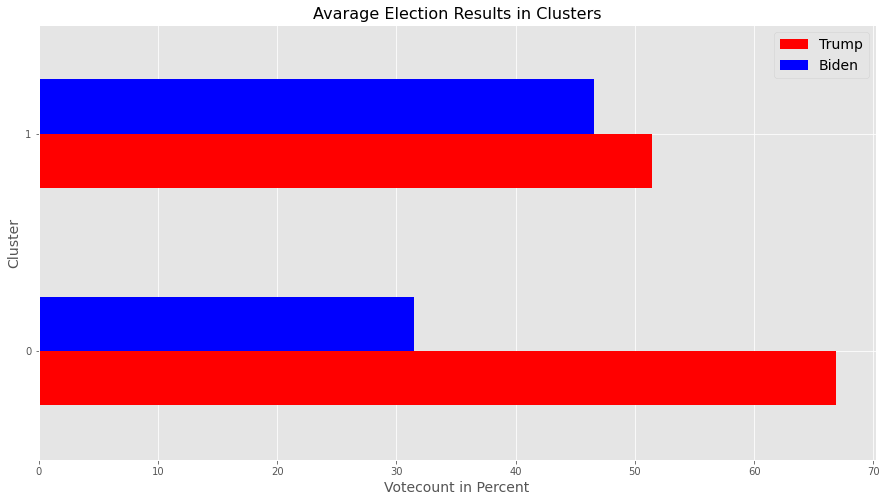

In [49]:
from matplotlib import pyplot as plt
pd_cluster=df_cities[['rel_trump','rel_biden','cluster']].groupby(['cluster']).mean()
pd_cluster['rel_trump'],pd_cluster['rel_biden']=pd_cluster['rel_trump']*100,pd_cluster['rel_biden']*100
pd_cluster.plot(kind='barh', figsize=(15,8),color=['red','blue'])
plt.xlabel('Votecount in Percent', fontsize=14)
plt.ylabel('Cluster',fontsize = 14)
plt.legend(['Trump', 'Biden'],fontsize=14)
plt.title('Avarage Election Results in Clusters', size=16)
plt.show()

Don't be confused with this chart, I thought I did something wrong! This shows Trump being far ahead in most counties. This is true! Biden won the large counties, and Trump won almost all of the small ones. The chart below will show you the combine the total votes in each cluster:

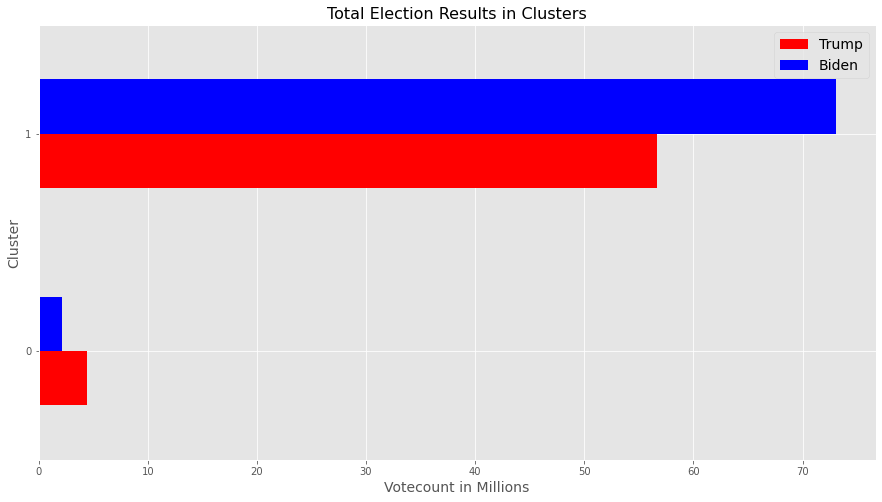

In [52]:
pd_cluster_tot=df_cities[['votes_trump','votes_biden','cluster']].groupby(['cluster']).sum()
pd_cluster_tot['votes_trump'],pd_cluster_tot['votes_biden']=pd_cluster_tot['votes_trump']/1000000,pd_cluster_tot['votes_biden']/1000000
pd_cluster_tot.plot(kind='barh', figsize=(15,8),color=['red','blue'])
plt.xlabel('Votecount in Millions', fontsize=14)
plt.ylabel('Cluster',fontsize = 14)
plt.legend(['Trump', 'Biden'],fontsize=14)
plt.title('Total Election Results in Clusters', size=16)
plt.show()

We can see that cluster 0 is largely voting for Trump, while cluster 1 prefers Biden. We can assume that all of the large cities are in cluster 1. <br>
Let's see how well our venues explain election-results above and beyond sociodemographic variables.

In [55]:
venue_train=X_train[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic','cluster']]
venue_test=X_test[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic','cluster']]

In [57]:
reg_venue = LinearRegression().fit(venue_train, y_train)

Let's repeat our analyses from above. First let's check our within train R²:

In [58]:
reg_venue.score(venue_train,y_train)

0.6696938020418065

In [59]:
print('Additionally explained variance by clusters in the training data-set:', reg_venue.score(venue_train,y_train)- reg_demog.score(demog_train,y_train))

Additionally explained variance by clusters in the training data-set: 0.004234079514076838


This is 'only' 0.4% additionally explained variance. Let's see what the r² is in the test-data:

In [60]:
reg_venue.score(venue_test,y_test)

0.6458372909665628

In [61]:
print('Additionally explained variance by clusters in the test data-set:', reg_venue.score(venue_test,y_test)- reg_demog.score(demog_test,y_test))

Additionally explained variance by clusters in the test data-set: -0.0010201472050561655


This is a lot more. 1%. Let's use our whole data-set for our final analysis and look at the regression-weights to see how our cluster-variable compares to the other variables when it comes to explaining power.

In [62]:
X_total=city_iv[['socioeconomic', 'education', 'population', 'age','white','black','asian','hispanic','cluster']]
y_total=df_cities['rel_trump']

In [63]:
reg_total=LinearRegression().fit(X_total,y_total)
reg_total.score(X_total,y_total)

0.666926898260981

In [64]:
pd.DataFrame(reg_total.coef_, columns=['regression coefficients'],index=X_total.columns).round(3)

,regression coefficients
socioeconomic,0.051
education,-0.074
population,-0.010
age,-0.016
white,0.045
black,-0.015
asian,-0.013
hispanic,-0.036
cluster,-0.026


Our cluster variable doesn't explains the election outcome as well as with the whole data set, which makes sense because we can expect the clusters to be more similar than before.President Trump received 2.6% more of the votes in cluster 0 when all other variables are controlled for - even population-size. We can see that the makeup of the venues explains a significant portion of the election results which has nothing to do with population-size. 

In [78]:
city_iv['BachXIncome']=city_iv['bachelorMin']*city_iv['income_median']

<ipython-input-78-58a917a3b16a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_iv['BachXIncome']=city_iv['bachelorMin']*city_iv['income_median']


In [79]:
regInt=LinearRegression().fit(city_iv[['bachelorMin','income_median', 'BachXIncome']], y_total)
regInt.score(city_iv[['bachelorMin','income_median', 'BachXIncome']], y_total)

0.39719801207793237

In [80]:
regInt.coef_

array([-0.11803545,  0.0336501 ,  0.00069352])

In [77]:
df_cities['income_median']

0      67986
1      63347
2      60241
3      65234
4      78777
       ...  
981    46259
982    45389
983    72645
984    48722
985    36760
Name: income_median, Length: 986, dtype: int64